# Chapter 7 Moving Beyond Linearity ÁßªÂä®Âà∞ÈùûÁ∫øÊÄß
Linearity is almost always an approximation, need more flexible models.

Á∫øÊÄßÂá†‰πéÊÄªÊòØ‰∏ÄÁßçËøë‰ººÔºåÈúÄË¶ÅÊõ¥ÁÅµÊ¥ªÁöÑÊ®°Âûã„ÄÇ
## Polynomial Regression Â§öÈ°πÂºèÂõûÂΩí
+ Extend linear model with polynomial terms (e.g. $X^2, X^3, \ldots$).
+ It's still a linear (in parameter) model but can model non-linear data.
+ Usually don't use polynomial terms higher than degree 3 or 4.
+ ‰ΩøÁî®Â§öÈ°πÂºèÈ°πÊâ©Â±ïÁ∫øÊÄßÊ®°ÂûãÔºà‰æãÂ¶Ç $X^2„ÄÅX^3„ÄÅ\ldots$Ôºâ„ÄÇ
+ ÂÆÉ‰ªçÁÑ∂ÊòØÁ∫øÊÄßÔºàÂèÇÊï∞ÔºâÊ®°ÂûãÔºå‰ΩÜÂèØ‰ª•ÂØπÈùûÁ∫øÊÄßÊï∞ÊçÆËøõË°åÂª∫Ê®°„ÄÇ
+ ÈÄöÂ∏∏‰∏çË¶Å‰ΩøÁî®È´ò‰∫é 3 Ê¨°Êàñ 4 Ê¨°ÁöÑÂ§öÈ°πÂºèÈ°π„ÄÇ



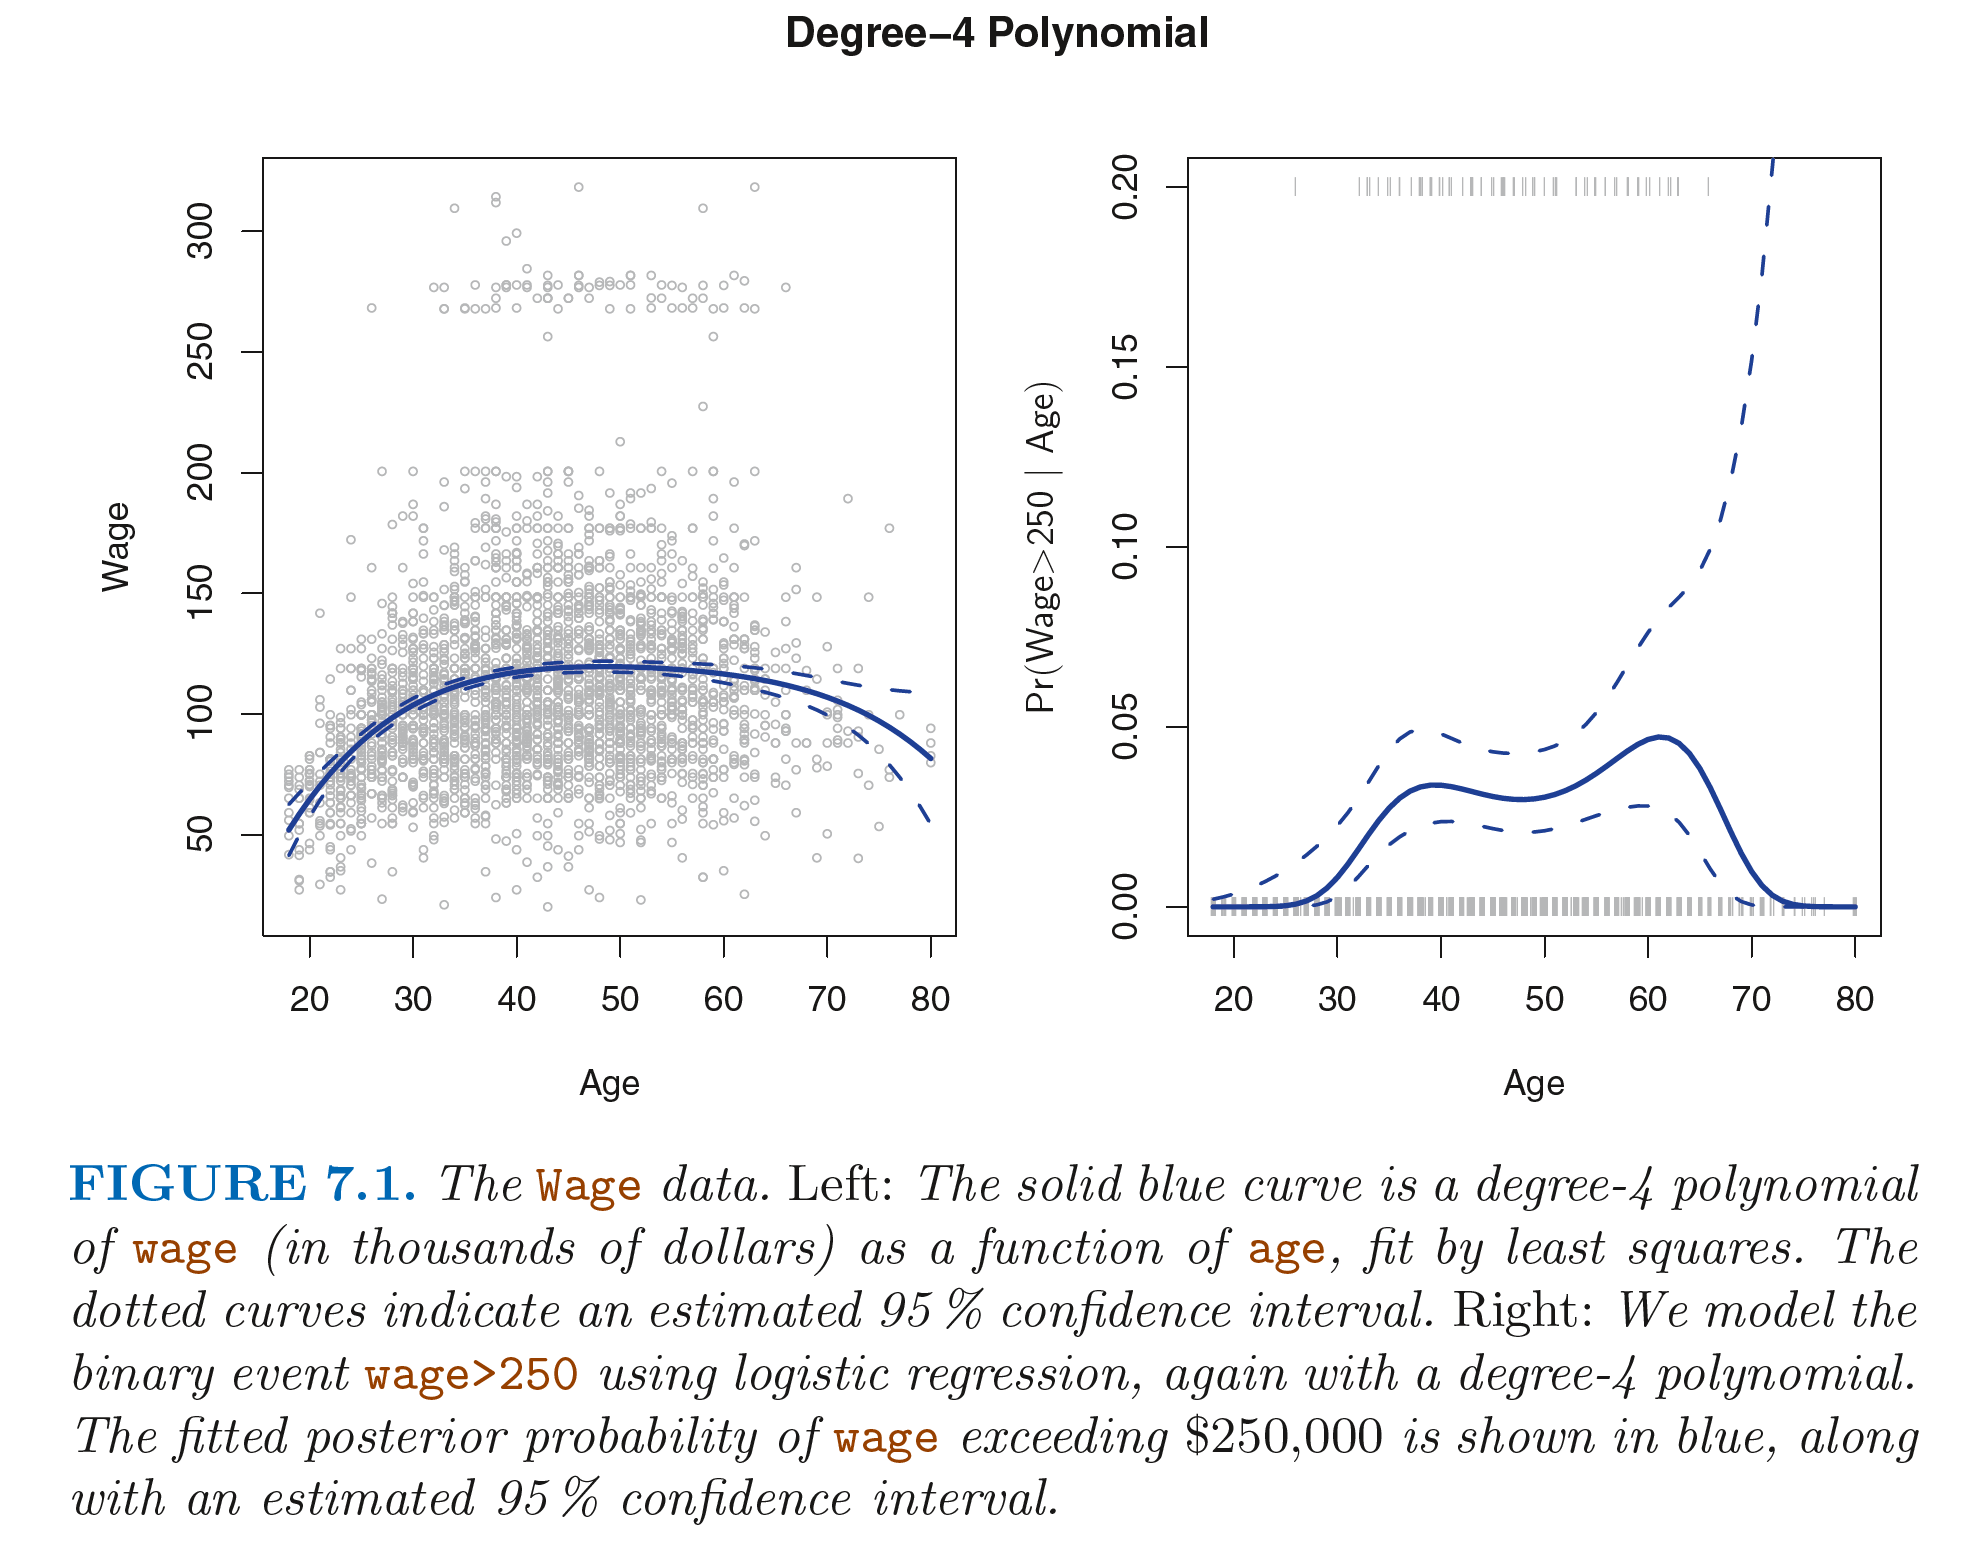

In [ ]:
from IPython.display import Image
Image('images/pw52.png', width =700)

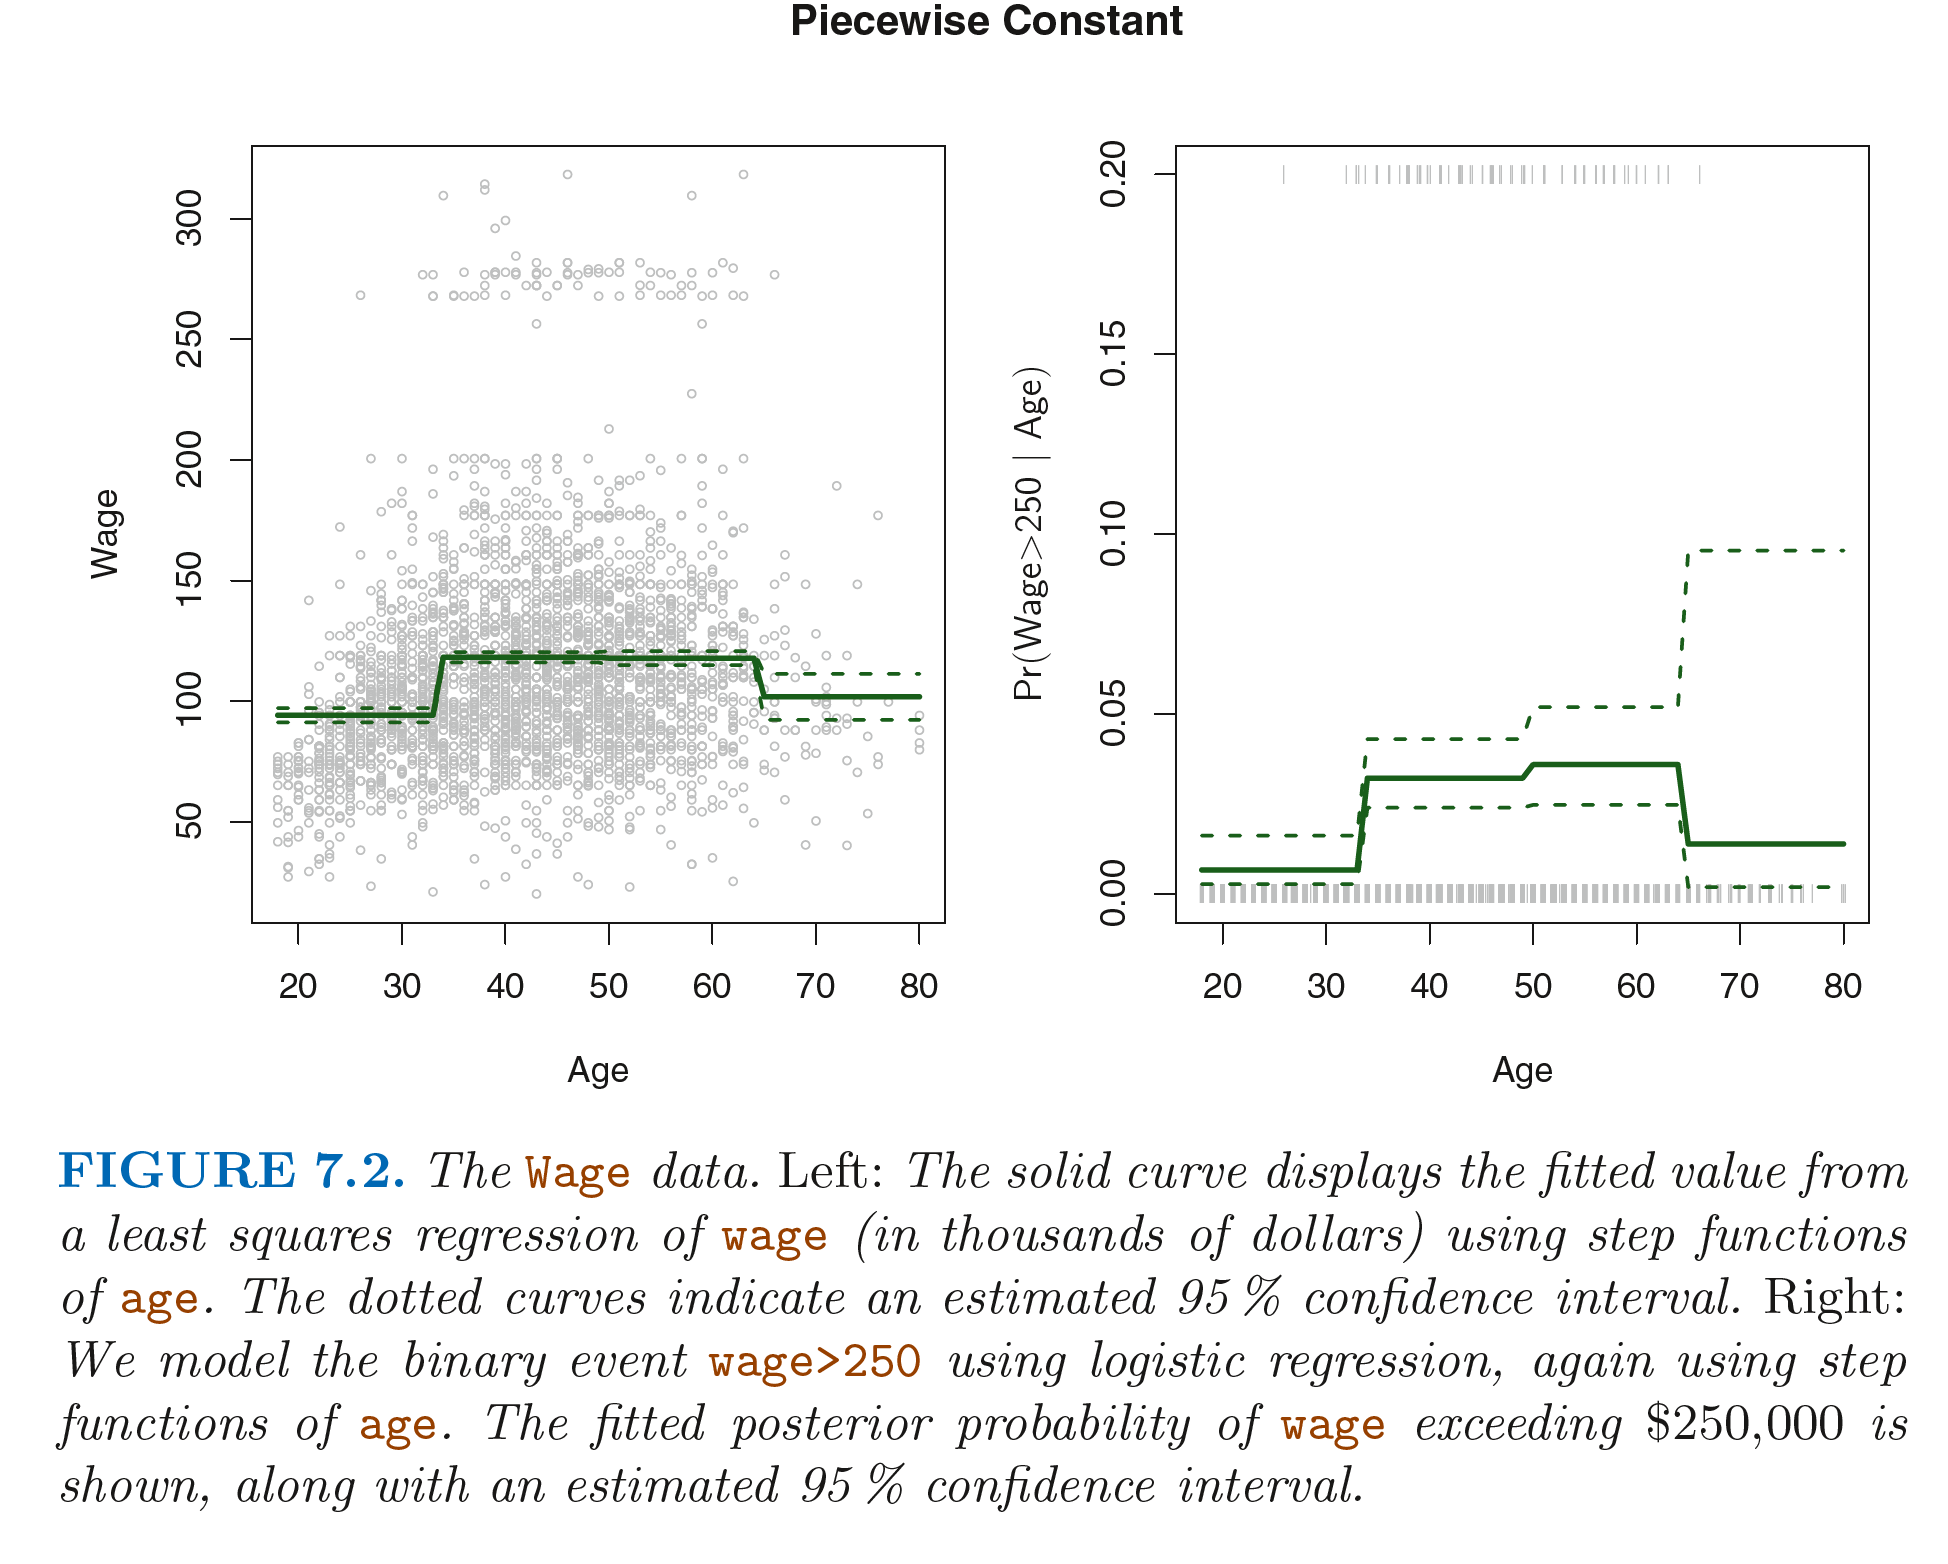

In [ ]:
Image('images/pw53.png', width =700)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

%matplotlib inline

Let explore how to generate the `Wage` dataset models:

ËÆ©Êàë‰ª¨Êé¢Á¥¢Â¶Ç‰ΩïÁîüÊàê‚ÄúÂ∑•ËµÑ‚ÄùÊï∞ÊçÆÈõÜÊ®°ÂûãÔºö

In [ ]:
df = pd.read_csv('/content/wage.csv')
df.head(3)

year  age      sex            maritl      race        education  \
0  2006   18  1. Male  1. Never Married  1. White     1. < HS Grad   
1  2004   24  1. Male  1. Never Married  1. White  4. College Grad   
2  2003   45  1. Male        2. Married  1. White  3. Some College   

               region        jobclass          health health_ins   logwage  \
0  2. Middle Atlantic   1. Industrial       1. <=Good      2. No  4.318063   
1  2. Middle Atlantic  2. Information  2. >=Very Good      2. No  4.255273   
2  2. Middle Atlantic   1. Industrial       1. <=Good     1. Yes  4.875061   

         wage  
0   75.043154  
1   70.476020  
2  130.982177

+ We first fit the polynomial regression model using the following commands:

+ Êàë‰ª¨È¶ñÂÖà‰ΩøÁî®‰ª•‰∏ãÂëΩ‰ª§ÊãüÂêàÂ§öÈ°πÂºèÂõûÂΩíÊ®°ÂûãÔºö

In [ ]:
X1 = PolynomialFeatures(1).fit_transform(df.age.values.reshape(-1,1))
X2 = PolynomialFeatures(2).fit_transform(df.age.values.reshape(-1,1))
X3 = PolynomialFeatures(3).fit_transform(df.age.values.reshape(-1,1))
X4 = PolynomialFeatures(4).fit_transform(df.age.values.reshape(-1,1))
X5 = PolynomialFeatures(5).fit_transform(df.age.values.reshape(-1,1))

+ This syntax fits a linear model, using the `PolynomialFeatures()` function, in order to predict wage using up to a fourth-degree polynomial in `age`.
+ The `PolynomialFeatures()` command allows us to avoid having to write out a long formula with powers
of `age`.
+ We can then fit our linear model:

+ Ê≠§ËØ≠Ê≥ï‰ΩøÁî® `PolynomialFeatures()` ÂáΩÊï∞ÊãüÂêàÁ∫øÊÄßÊ®°ÂûãÔºå‰ª•‰æø‰ΩøÁî® `age` ‰∏≠ÁöÑÂõõÊ¨°Â§öÈ°πÂºèÊù•È¢ÑÊµãÂ∑•ËµÑ„ÄÇ
+ `PolynomialFeatures()` ÂëΩ‰ª§‰ΩøÊàë‰ª¨‰∏çÂøÖÂÜôÂá∫Â∏¶Êúâ `age` ÂπÇÁöÑÈïøÂÖ¨Âºè„ÄÇ
+ ÁÑ∂ÂêéÊàë‰ª¨ÂèØ‰ª•ÊãüÂêàÊàë‰ª¨ÁöÑÁ∫øÊÄßÊ®°ÂûãÔºö

In [ ]:
fit2 = sm.GLS(df.wage, X4).fit()
fit2.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

+ Next, consider the task of predicting whether an individual earns more than \$250,000 per year.
+ First, create the appropriate response vector, and then fit a logistic model using the `GLM()` function from `statsmodels`:

+ Êé•‰∏ãÊù•ÔºåËÄÉËôëÈ¢ÑÊµã‰∏Ä‰∏™‰∫∫ÁöÑÂπ¥Êî∂ÂÖ•ÊòØÂê¶Ë∂ÖËøá 25 ‰∏áÁæéÂÖÉ„ÄÇ
+ È¶ñÂÖàÔºåÂàõÂª∫ÈÄÇÂΩìÁöÑÂìçÂ∫îÂêëÈáèÔºåÁÑ∂Âêé‰ΩøÁî® `statsmodels` ‰∏≠ÁöÑ `GLM()` ÂáΩÊï∞ÊãüÂêàÈÄªËæëÊ®°ÂûãÔºö

In [ ]:
# Create response matrix
y = (df.wage > 250).map({False:0, True:1}).to_numpy()

# Fit logistic model
clf = sm.GLM(y, X4, family=sm.families.Binomial(sm.families.links.logit()))
res = clf.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The logit link alias is deprecated. Use Logit instead. The logit link alias will be removed after the 0.15.0 release.
  warnings.warn(


+ Create a grid of values for `age` at which we want predictions, and then call the generic `predict()` function for each model:

+ ‰∏∫Êàë‰ª¨ÊÉ≥Ë¶ÅÈ¢ÑÊµãÁöÑ‚ÄúÂπ¥ÈæÑ‚ÄùÂàõÂª∫‰∏Ä‰∏™ÂÄºÁΩëÊ†ºÔºåÁÑ∂Âêé‰∏∫ÊØè‰∏™Ê®°ÂûãË∞ÉÁî®ÈÄöÁî®ÁöÑ‚Äúpredict()‚ÄùÂáΩÊï∞Ôºö

In [ ]:
# Generate a sequence of age values spanning the range ÁîüÊàê‰∏ÄÁ≥ªÂàóË∑®Ë∂äËåÉÂõ¥ÁöÑÂπ¥ÈæÑÂÄº
age_grid = np.arange(df.age.min(), df.age.max()).reshape(-1,1)

# Generate test data ÁîüÊàêÊµãËØïÊï∞ÊçÆ
X_test = PolynomialFeatures(4).fit_transform(age_grid)

# Predict the value of the generated ages È¢ÑÊµãÁîüÊàêÁöÑÂπ¥ÈæÑÂÄº
pred1 = fit2.predict(X_test) # salary
pred2 = res.predict(X_test)  # Pr(wage>250)

+ Finally, plot the data and add the fit from the degree-4 polynomial.

+ ÊúÄÂêéÔºåÁªòÂà∂Êï∞ÊçÆÂπ∂Ê∑ªÂä† 4 Ê¨°Â§öÈ°πÂºèÁöÑÊãüÂêàÂÄº„ÄÇ

Text(0, 0.5, 'Pr(wage>250|age)')

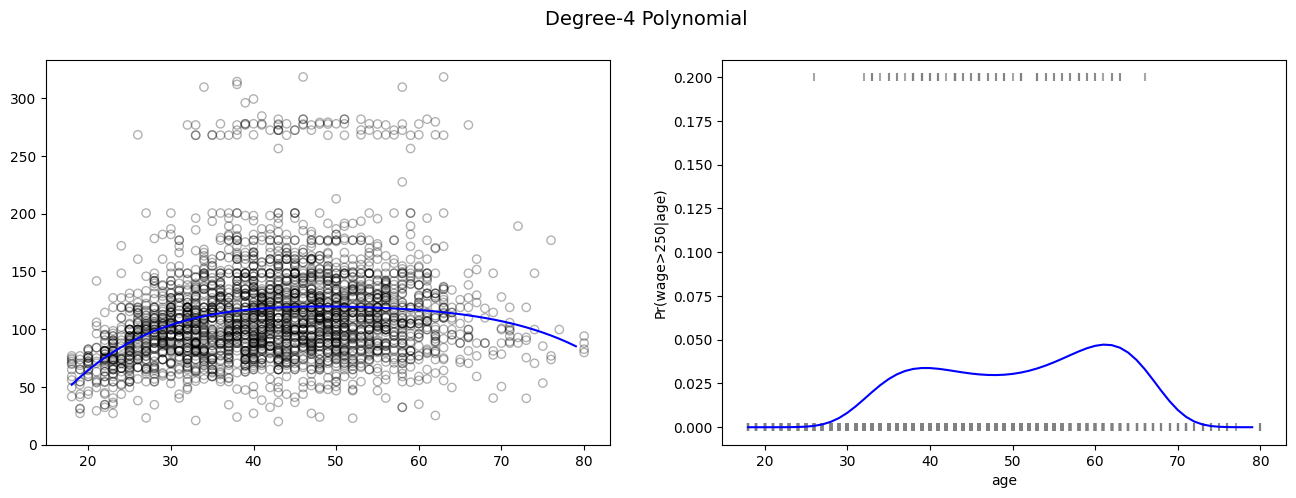

In [ ]:
# creating plots ÂàõÈÄ†ÊÉÖËäÇ
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,5))
fig.suptitle('Degree-4 Polynomial', fontsize=14)

# Scatter plot with polynomial regression line Â∏¶ÊúâÂ§öÈ°πÂºèÂõûÂΩíÁ∫øÁöÑÊï£ÁÇπÂõæ
ax1.scatter(df.age, df.wage, facecolor='None', edgecolor='k', alpha=0.3)
ax1.plot(age_grid, pred1, color = 'b')
ax1.set_ylim(ymin=0)

# Logistic regression showing Pr(wage>250) for the age range. ÈÄªËæëÂõûÂΩíÊòæÁ§∫Âπ¥ÈæÑËåÉÂõ¥ÂÜÖÁöÑ PrÔºàÂ∑•ËµÑ>250Ôºâ„ÄÇ
ax2.plot(age_grid, pred2, color='b')

# Rug plot showing the distribution of wage>250 in the training data. Âú∞ÊØØÂõæÊòæÁ§∫‰∫ÜËÆ≠ÁªÉÊï∞ÊçÆ‰∏≠Â∑•ËµÑ>250ÁöÑÂàÜÂ∏É„ÄÇ
# 'True' on the top, 'False' on the bottom. È°∂ÈÉ®‰∏∫‚ÄúTrue‚ÄùÔºåÂ∫ïÈÉ®‰∏∫‚ÄúFalse‚Äù„ÄÇ
ax2.scatter(df.age, y/5, s=30, c='grey', marker='|', alpha=0.7)

ax2.set_ylim(-0.01,0.21)
ax2.set_xlabel('age')
ax2.set_ylabel('Pr(wage>250|age)')

### Deciding on a degree

+ In performing a polynomial regression we must decide on the degree of the polynomial to use. One way to do this is by using hypothesis tests.
+ Now fit models ranging from linear to a degree-5 polynomial and  determine the simplest model which is sufficient to explain the relationship between `wage` and `age`.
+ Do this using the `anova_lm()` function, which performs an analysis of variance (ANOVA, using an F-test) in order to test the null hypothesis that a model $M_1$ is sufficient to explain the data against the  alternative hypothesis that a more complex model $M_2$ is required.
+ In order to use the `anova_lm()` function, $M_1$ and $M_2$ must be **nested models**: the predictors in $M_1$ must be a subset of the predictors in $M_2$.
+ In this case, we fit five different models and sequentially compare the simpler model to the more complex model

(*Note:* you may get an *invalid value* Runtime Warning on the first model, because there is no "simpler model" to compare to):

+ Âú®ÊâßË°åÂ§öÈ°πÂºèÂõûÂΩíÊó∂ÔºåÊàë‰ª¨ÂøÖÈ°ªÂÜ≥ÂÆöË¶Å‰ΩøÁî®ÁöÑÂ§öÈ°πÂºèÁöÑÊ¨°Êï∞„ÄÇ‰∏ÄÁßçÊñπÊ≥ïÊòØ‰ΩøÁî®ÂÅáËÆæÊ£ÄÈ™å„ÄÇ
+ Áé∞Âú®ÔºåÊãüÂêà‰ªéÁ∫øÊÄßÂà∞ 5 Ê¨°Â§öÈ°πÂºèÁöÑÊ®°ÂûãÔºåÂπ∂Á°ÆÂÆöË∂≥‰ª•Ëß£Èáä‚ÄúÂ∑•ËµÑ‚ÄùÂíå‚ÄúÂπ¥ÈæÑ‚Äù‰πãÈó¥ÂÖ≥Á≥ªÁöÑÊúÄÁÆÄÂçïÊ®°Âûã„ÄÇ
+ ‰ΩøÁî® `anova_lm()` ÂáΩÊï∞ÊâßË°åÊ≠§Êìç‰ΩúÔºåËØ•ÂáΩÊï∞ÊâßË°åÊñπÂ∑ÆÂàÜÊûêÔºàANOVAÔºå‰ΩøÁî® F Ê£ÄÈ™åÔºâ‰ª•Ê£ÄÈ™åÈõ∂ÂÅáËÆæÔºàÂç≥Ê®°Âûã $M_1$ Ë∂≥‰ª•Ëß£ÈáäÊï∞ÊçÆÔºâ‰∏éÂ§áÈÄâÂÅáËÆæÔºàÂç≥ÈúÄË¶ÅÊõ¥Â§çÊùÇÁöÑÊ®°Âûã $M_2$Ôºâ„ÄÇ
+ ‰∏∫‰∫Ü‰ΩøÁî® `anova_lm()` ÂáΩÊï∞Ôºå$M_1$ Âíå $M_2$ ÂøÖÈ°ªÊòØ**ÂµåÂ•óÊ®°Âûã**Ôºö$M_1$ ‰∏≠ÁöÑÈ¢ÑÊµãÂèòÈáèÂøÖÈ°ªÊòØ $M_2$ ‰∏≠È¢ÑÊµãÂèòÈáèÁöÑÂ≠êÈõÜ„ÄÇ
+ Âú®ËøôÁßçÊÉÖÂÜµ‰∏ãÔºåÊàë‰ª¨ÊãüÂêà‰∫Ü‰∫î‰∏™‰∏çÂêåÁöÑÊ®°ÂûãÔºåÂπ∂ÊåâÈ°∫Â∫èÂ∞ÜËæÉÁÆÄÂçïÁöÑÊ®°Âûã‰∏éËæÉÂ§çÊùÇÁöÑÊ®°ÂûãËøõË°åÊØîËæÉ

Ôºà*Ê≥®ÊÑèÔºö*ÊÇ®ÂèØËÉΩ‰ºöÂú®Á¨¨‰∏Ä‰∏™Ê®°Âûã‰∏äÊî∂Âà∞*Êó†ÊïàÂÄº*ËøêË°åÊó∂Ë≠¶ÂëäÔºåÂõ†‰∏∫Ê≤°Êúâ‚ÄúËæÉÁÆÄÂçïÁöÑÊ®°Âûã‚ÄùÂèØ‰æõÊØîËæÉÔºâÔºö

In [ ]:
fit_1 = fit = sm.GLS(df.wage, X1).fit()
fit_2 = fit = sm.GLS(df.wage, X2).fit()
fit_3 = fit = sm.GLS(df.wage, X3).fit()
fit_4 = fit = sm.GLS(df.wage, X4).fit()
fit_5 = fit = sm.GLS(df.wage, X5).fit()

print(sm.stats.anova_lm(fit_1, fit_2, fit_3, fit_4, fit_5, typ=1))

   df_resid           ssr  df_diff        ss_diff           F        Pr(>F)
0    2998.0  5.022216e+06      0.0            NaN         NaN           NaN
1    2997.0  4.793430e+06      1.0  228786.010128  143.593107  2.363850e-32
2    2996.0  4.777674e+06      1.0   15755.693664    9.888756  1.679202e-03
3    2995.0  4.771604e+06      1.0    6070.152124    3.809813  5.104620e-02
4    2994.0  4.770322e+06      1.0    1282.563017    0.804976  3.696820e-01


+ The $p$-value comparing the linear Model 1 to the quadratic Model 2 is essentially zero $(<10^{-32})$, indicating that a linear fit is not sufficient.
+ Similarly the $p$-value comparing the quadratic Model 2 to the cubic Model 3 is very low (0.0017), so the quadratic fit is also insufficient.
+ The $p$-value comparing the cubic and degree-4 polynomials, Model 3 and Model 4, is approximately 0.05 while the degree-5 polynomial Model 5 seems unnecessary because its $p$-value is 0.37.
+ Hence, either a cubic or a quartic polynomial appear to provide a reasonable fit to the data, but lower- or higher-order models are not justified.

+ Á∫øÊÄßÊ®°Âûã 1 ‰∏é‰∫åÊ¨°Ê®°Âûã 2 ÁöÑÊØîËæÉÁªìÊûúÊòæÁ§∫Ôºå$p$ ÂÄºÂü∫Êú¨‰∏∫Èõ∂ $(<10^{-32})$ÔºåË°®ÊòéÁ∫øÊÄßÊãüÂêà‰∏çÂ§üÂÖÖÂàÜ„ÄÇ
+ Á±ª‰ººÂú∞Ôºå‰∫åÊ¨°Ê®°Âûã 2 ‰∏é‰∏âÊ¨°Ê®°Âûã 3 ÁöÑÊØîËæÉÁªìÊûúÊòæÁ§∫Ôºå$p$ ÂÄºÈùûÂ∏∏‰Ωé (0.0017)ÔºåÂõ†Ê≠§‰∫åÊ¨°ÊãüÂêà‰πü‰∏çÂ§üÂÖÖÂàÜ„ÄÇ
+ ‰∏âÊ¨°ÂíåÂõõÊ¨°Â§öÈ°πÂºèÔºàÊ®°Âûã 3 ÂíåÊ®°Âûã 4ÔºâÁöÑÊØîËæÉÁªìÊûúÊòæÁ§∫Ôºå$p$ ÂÄºÁ∫¶‰∏∫ 0.05ÔºåËÄå‰∫îÊ¨°Â§öÈ°πÂºèÔºàÊ®°Âûã 5ÔºâÁöÑ $p$ ÂÄº‰ºº‰πéÊòØ‰∏çÂøÖË¶ÅÁöÑÔºåÂõ†‰∏∫ÂÆÉÁöÑ $p$ ÂÄº‰∏∫ 0.37„ÄÇ
+ Âõ†Ê≠§Ôºå‰∏âÊ¨°ÊàñÂõõÊ¨°Â§öÈ°πÂºè‰ºº‰πéÈÉΩÂèØ‰ª•ÂêàÁêÜÂú∞ÊãüÂêàÊï∞ÊçÆÔºå‰ΩÜ‰ΩéÈò∂ÊàñÈ´òÈò∂Ê®°ÂûãÂàô‰∏çÂêàÁêÜ„ÄÇ

## Step Functions Ê≠•È™§ÂáΩÊï∞
+ Also known as piecewise constant regression.
+ Cut $X$ into $K$ different regions and fit a constant to each region.
$$y_i = \beta_0 + \beta_1C_1(x_i) + \beta_2C_2(x_i) + \ldots + \beta_KC_K(x_i) + \epsilon _i$$
where
$$\begin{align*}
 C_0(X) &= I(X<c_1) \\
 C_1(X) &= I(c_1 \leq X < c_2) \\
 & \vdots \\
 C_{K-1}(X) &= I(c_{K-1} \leq X < c_K) \\
 C_{K}(X) &= I(X \geq c_K)
\end{align*}$$
+ The model reduces to $\hat{y} = \beta_0 + \beta_k$ where $k$ is the $k^\textrm{th}$ region.
+ $\beta_0$ is just the estimate for y (the mean) in the region before the first cut point.
+ Can use same approach for logistic regression to get a flat probability estimate for each region.

+ ‰πüÁß∞‰∏∫ÂàÜÊÆµÂ∏∏Êï∞ÂõûÂΩí„ÄÇ
+ Â∞Ü $X$ ÂàáÂâ≤Êàê $K$ ‰∏™‰∏çÂêåÁöÑÂå∫ÂüüÔºåÂπ∂‰∏∫ÊØè‰∏™Âå∫ÂüüÊãüÂêà‰∏Ä‰∏™Â∏∏Êï∞„ÄÇ
$$y_i = \beta_0 + \beta_1C_1(x_i) + \beta_2C_2(x_i) + \ldots + \beta_KC_K(x_i) + \epsilon _i$$
ÂÖ∂‰∏≠
$$\begin{align*}
C_0(X) &= I(X<c_1) \\
C_1(X) &= I(c_1 \leq X < c_2) \\
& \vdots \\
C_{K-1}(X) &= I(c_{K-1} \leq X < c_K) \\
C_{K}(X) &= I(X \geq c_K)
\end{align*}$$
+ ËØ•Ê®°ÂûãÁÆÄÂåñ‰∏∫ $\hat{y} = \beta_0 + \beta_k$ÔºåÂÖ∂‰∏≠ $k$ ÊòØ$k^\textrm{th}$ ‰∏™Âå∫Âüü„ÄÇ
+ $\beta_0$ Âè™ÊòØÁ¨¨‰∏Ä‰∏™ÂàáÁÇπ‰πãÂâçÂå∫Âüü‰∏≠ yÔºàÂπ≥ÂùáÂÄºÔºâÁöÑ‰º∞ËÆ°ÂÄº„ÄÇ
+ ÂèØ‰ª•‰ΩøÁî®‰∏éÈÄªËæëÂõûÂΩíÁõ∏ÂêåÁöÑÊñπÊ≥ïÊù•Ëé∑ÂæóÊØè‰∏™Âå∫ÂüüÁöÑÂπ≥Âù¶Ê¶ÇÁéá‰º∞ËÆ°ÂÄº„ÄÇ



### Example
+ In order to fit a step function, we use the `cut()` function:

+ ‰∏∫‰∫ÜÊãüÂêàÈò∂Ë∑ÉÂáΩÊï∞ÔºåÊàë‰ª¨‰ΩøÁî® `cut()` ÂáΩÊï∞Ôºö

In [ ]:
df_cut, bins = pd.cut(df.age, 4, retbins = True, right = True)
df_cut.value_counts(sort = False)

age
(17.938, 33.5]     750
(33.5, 49.0]      1399
(49.0, 64.5]       779
(64.5, 80.0]        72
Name: count, dtype: int64

+ Here `cut()` automatically picked the cutpoints at 33.5, 49, and 64.5 years of age.
+ We could also have specified our own cutpoints directly.
+ Now let's create a set of dummy variables for use in the regression:

+ Ê≠§Â§Ñ `cut()` Ëá™Âä®ÈÄâÂèñ 33.5„ÄÅ49 Âíå 64.5 Â≤ÅÁöÑÊà™ÁÇπ„ÄÇ
+ Êàë‰ª¨‰πüÂèØ‰ª•Áõ¥Êé•ÊåáÂÆöËá™Â∑±ÁöÑÊà™ÁÇπ„ÄÇ
+ Áé∞Âú®ËÆ©Êàë‰ª¨ÂàõÂª∫‰∏ÄÁªÑÁî®‰∫éÂõûÂΩíÁöÑËôöÊãüÂèòÈáèÔºö

In [ ]:
df_steps = pd.concat([df.age, df_cut, df.wage], keys = ['age','age_cuts','wage'], axis = 1)

# Create dummy variables for the age groups ‰∏∫Âπ¥ÈæÑÁªÑÂàõÂª∫ËôöÊãüÂèòÈáè
df_steps_dummies = pd.get_dummies(df_steps['age_cuts'])

# Statsmodels requires explicit adding of a constant (intercept) Statsmodels ÈúÄË¶ÅÊòéÁ°ÆÊ∑ªÂä†Â∏∏Êï∞ÔºàÊà™Ë∑ùÔºâ
df_steps_dummies = sm.add_constant(df_steps_dummies)

# Drop the (17.938, 33.5] category Âà†Èô§ (17.938, 33.5] Á±ªÂà´
df_steps_dummies = df_steps_dummies.drop(df_steps_dummies.columns[1], axis = 1)

df_steps_dummies.head(5)

const  (33.5, 49.0]  (49.0, 64.5]  (64.5, 80.0]
0    1.0         False         False         False
1    1.0         False         False         False
2    1.0          True         False         False
3    1.0          True         False         False
4    1.0         False          True         False

+ Now to fit the models.
+ We dropped the `age<33.5` category, so the intercept coefficient can be interpreted as the average salary for those under 33.5 years of age.
+ The other coefficients can be interpreted as the average additional salary for those in the other age groups.
+ Áé∞Âú®Êù•ÊãüÂêàÊ®°Âûã„ÄÇ
+ Êàë‰ª¨Âà†Èô§‰∫Ü‚ÄúÂπ¥ÈæÑ<33.5‚ÄùÁ±ªÂà´ÔºåÂõ†Ê≠§Êà™Ë∑ùÁ≥ªÊï∞ÂèØ‰ª•Ëß£Èáä‰∏∫Âπ¥ÈæÑÂú® 33.5 Â≤Å‰ª•‰∏ã‰∫∫Áæ§ÁöÑÂπ≥ÂùáÂ∑•ËµÑ„ÄÇ
+ ÂÖ∂‰ªñÁ≥ªÊï∞ÂèØ‰ª•Ëß£Èáä‰∏∫ÂÖ∂‰ªñÂπ¥ÈæÑÊÆµ‰∫∫Áæ§ÁöÑÂπ≥ÂùáÈ¢ùÂ§ñÂ∑•ËµÑ„ÄÇ

In [ ]:
fit3 = sm.GLM(df_steps.wage, df_steps_dummies.astype(int)).fit()
fit3.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

+ The intercept coefficient of 94,160 can be interpreted as the average salary for those under 33.5 years of age.
+ The other coefficients can be interpreted as the average additional salary for those in the other age groups.
+ Êà™Ë∑ùÁ≥ªÊï∞ 94,160 ÂèØ‰ª•Ëß£Èáä‰∏∫ 33.5 Â≤Å‰ª•‰∏ã‰∫∫Áæ§ÁöÑÂπ≥ÂùáÂ∑•ËµÑ„ÄÇ
+ ÂÖ∂‰ªñÁ≥ªÊï∞ÂèØ‰ª•Ëß£Èáä‰∏∫ÂÖ∂‰ªñÂπ¥ÈæÑÊÆµ‰∫∫Áæ§ÁöÑÂπ≥ÂùáÈ¢ùÂ§ñÂ∑•ËµÑ„ÄÇ

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The logit link alias is deprecated. Use Logit instead. The logit link alias will be removed after the 0.15.0 release.
  warnings.warn(


Text(0, 0.5, 'Pr(wage>250|age)')

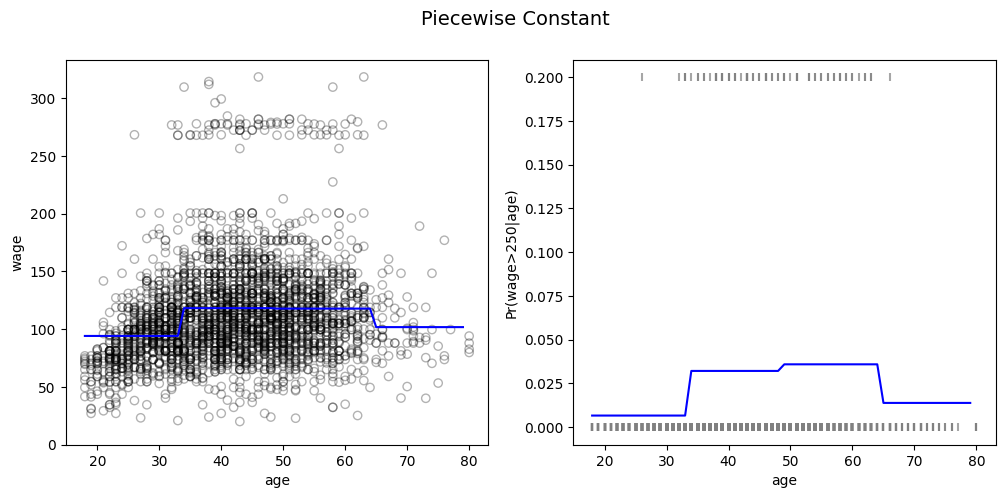

In [ ]:
# Put the test data in the same bins as the training data.
# Â∞ÜÊµãËØïÊï∞ÊçÆÊîæÂú®‰∏éËÆ≠ÁªÉÊï∞ÊçÆÁõ∏ÂêåÁöÑÁÆ±‰∏≠„ÄÇ
bin_mapping = np.digitize(age_grid.ravel(), bins)

# Get dummies, drop first dummy category, add constant Ëé∑ÂèñËôöÊãüÂèòÈáèÔºåÂà†Èô§Á¨¨‰∏Ä‰∏™ËôöÊãüÁ±ªÂà´ÔºåÊ∑ªÂä†Â∏∏Èáè
X_test2 = sm.add_constant(pd.get_dummies(bin_mapping).drop(1, axis = 1))

# Predict the value of the generated ages using the linear model ‰ΩøÁî®Á∫øÊÄßÊ®°ÂûãÈ¢ÑÊµãÁîüÊàêÂπ¥ÈæÑÁöÑÂÄº
pred2 = fit3.predict(X_test2)

# And the logistic model ÈÄªËæëÊ®°Âûã
clf2 = sm.GLM(y, df_steps_dummies.astype(int),
              family=sm.families.Binomial(sm.families.links.logit()))
res2 = clf2.fit()
pred3 = res2.predict(X_test2.astype(int))

# Plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,5))
fig.suptitle('Piecewise Constant', fontsize = 14)

# Scatter plot with polynomial regression line Â∏¶ÊúâÂ§öÈ°πÂºèÂõûÂΩíÁ∫øÁöÑÊï£ÁÇπÂõæ
ax1.scatter(df.age, df.wage, facecolor = 'None', edgecolor = 'k', alpha = 0.3)
ax1.plot(age_grid, pred2, c = 'b')

ax1.set_xlabel('age')
ax1.set_ylabel('wage')
ax1.set_ylim(ymin = 0)

# Logistic regression showing Pr(wage>250) for the age range. ÈÄªËæëÂõûÂΩíÊòæÁ§∫Âπ¥ÈæÑËåÉÂõ¥ÂÜÖÁöÑ PrÔºàÂ∑•ËµÑ>250Ôºâ„ÄÇ
ax2.plot(np.arange(df.age.min(), df.age.max()).reshape(-1,1), pred3, color = 'b')

# Rug plot showing the distribution of wage>250 in the training data. Âú∞ÊØØÂõæÊòæÁ§∫‰∫ÜËÆ≠ÁªÉÊï∞ÊçÆ‰∏≠Â∑•ËµÑ>250ÁöÑÂàÜÂ∏É„ÄÇ
# 'True' on the top, 'False' on the bottom. È°∂ÈÉ®‰∏∫‚ÄúTrue‚ÄùÔºåÂ∫ïÈÉ®‰∏∫‚ÄúFalse‚Äù„ÄÇ
ax2.scatter(df.age, y/5, s = 30, c = 'grey', marker = '|', alpha = 0.7)

ax2.set_ylim(-0.01, 0.21)
ax2.set_xlabel('age')
ax2.set_ylabel('Pr(wage>250|age)')

## Basis functions Âü∫Á°ÄÂáΩÊï∞
+ Polynomial terms and step function are both types of basis functions.
+ A basis function, $b_k(X)$, is a function that transforms $X$.
$$y_i = \beta_0 + \beta_1b_1(x_i) + \beta_2b_2(x_i) + \ldots + \beta_Kb_K(x_i) + \epsilon _i$$
+ For polynomial regression, this is simply raising $X$ to a power and for step functions this is transforming $X$ into 0 or 1 based on whether $X$ is in a region or not (indicator variable).
+ Wavelets and fourier series are also basis functions.
+ Â§öÈ°πÂºèÈ°πÂíåÈò∂Ë∑ÉÂáΩÊï∞ÈÉΩÊòØÂü∫ÂáΩÊï∞„ÄÇ
+ Âü∫ÂáΩÊï∞ $b_k(X)$ ÊòØÂèòÊç¢ $X$ ÁöÑÂáΩÊï∞„ÄÇ
$$y_i = \beta_0 + \beta_1b_1(x_i) + \beta_2b_2(x_i) + \ldots + \beta_Kb_K(x_i) + \epsilon _i$$
+ ÂØπ‰∫éÂ§öÈ°πÂºèÂõûÂΩíÔºåËøôÂè™ÊòØÂ∞Ü $X$ ÊèêÂçá‰∏∫ÂπÇÔºåËÄåÂØπ‰∫éÈò∂Ë∑ÉÂáΩÊï∞ÔºåËøôÊòØÊ†πÊçÆ $X$ ÊòØÂê¶Âú®Êüê‰∏™Âå∫ÂüüÂÜÖÔºàÊåáÁ§∫ÂèòÈáèÔºâÂ∞Ü $X$ ÂèòÊç¢‰∏∫ 0 Êàñ 1„ÄÇ
+ Â∞èÊ≥¢ÂíåÂÇÖÈáåÂè∂Á∫ßÊï∞‰πüÊòØÂü∫ÂáΩÊï∞„ÄÇ

## Regression Splines ÂõûÂΩíÊ†∑Êù°
+ Combining piecewise constant regression and polynomial regression
+ ÁªìÂêàÂàÜÊÆµÂ∏∏Êï∞ÂõûÂΩíÂíåÂ§öÈ°πÂºèÂõûÂΩí

### Piecewise polynomials ÂàÜÊÆµÂ§öÈ°πÂºè
+ Fit separate low degree polynomials over different regions of $X$.
+ It works by fitting a cubic regression model
$$y_i = \beta_0 + \beta_1 x_i + \beta_2x_i^2 + \beta_3 x_i^3 + \epsilon_i$$
where the coefficients differ in different parts of the range $X$.
+ The place where the coefficients change are called knots.
+ The polynomials are contrained so that they join smoothly at the knots.
+ Example of piecewise cubic polynomial with as single knot at point $c$:
$$y_i = \begin{cases}
\beta_{01} + \beta_{11} x_i + \beta_{21}x_i^2 + \beta_{31} x_i^3 + \epsilon_i & \textrm{if }x_i<c\\
\beta_{02} + \beta_{12} x_i + \beta_{22}x_i^2 + \beta_{32} x_i^3 + \epsilon_i & \textrm{if }x_i\geq c
\end{cases}$$

+ Âú® $X$ ÁöÑ‰∏çÂêåÂå∫Âüü‰∏äÊãüÂêàÂçïÁã¨ÁöÑ‰ΩéÊ¨°Â§öÈ°πÂºè„ÄÇ
+ ÂÆÉÈÄöËøáÊãüÂêà‰∏âÊ¨°ÂõûÂΩíÊ®°ÂûãÊù•Â∑•‰Ωú
$$y_i = \beta_0 + \beta_1 x_i + \beta_2x_i^2 + \beta_3 x_i^3 + \epsilon_i$$
ÂÖ∂‰∏≠Á≥ªÊï∞Âú®ËåÉÂõ¥ $X$ ÁöÑ‰∏çÂêåÈÉ®ÂàÜ‰∏çÂêå„ÄÇ
+ Á≥ªÊï∞ÂèëÁîüÂèòÂåñÁöÑÂú∞ÊñπÁß∞‰∏∫ÁªìÁÇπ„ÄÇ
+ Â§öÈ°πÂºèÂèóÂà∞Á∫¶ÊùüÔºåÂõ†Ê≠§ÂÆÉ‰ª¨Âú®ÁªìÁÇπÂ§ÑÂπ≥ÊªëËøûÊé•„ÄÇ
+ Âú®ÁÇπ $c$ Â§ÑÂÖ∑ÊúâÂçï‰∏™ÁªìÁÇπÁöÑÂàÜÊÆµ‰∏âÊ¨°Â§öÈ°πÂºèÁ§∫‰æãÔºö
$$y_i = \begin{cases}
\beta_{01} + \beta_{11} x_i + \beta_{21}x_i^2 + \beta_{31} x_i^3 + \epsilon_i & \textrm{if }x_i<c\\
\beta_{02} + \beta_{12} x_i + \beta_{22}x_i^2 + \beta_{32} x_i^3 + \epsilon_i & \textrm{if }x_i\geq c
\end{cases}$$





### Splines Ê†∑Êù°Á∫ø
+ Piecewise polynomials with constraints that the curves be continuous and smooth - meaning both first and second derivatives must match at the knot.
+ Fitting a spline turns out to be surprisingly simpler than it seems.
+ We don't have to fit a 3 degree polynomial for each region.
+ By smartly choosing basis functions, we can use least squares to solve for all the coefficients.
+ We use the truncated power basis function which is
$$h(x, \xi) = \begin{cases}
(x -\xi)^3, & x > \xi \\
0 & \textrm{otherwise}
\end{cases}$$
where $\xi$ is a knot.

+ The equation to send to least squares is
$$\hat{y} = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 +  b_1h(x, \xi_1) + \ldots + b_Kh(x, \xi_K)$$ where we have $K$ truncated power transformations for a total of $K + 3$ predictors.

+ ÂàÜÊÆµÂ§öÈ°πÂºèÁöÑÁ∫¶ÊùüÊù°‰ª∂ÊòØÊõ≤Á∫øËøûÁª≠‰∏îÂπ≥Êªë - ËøôÊÑèÂë≥ÁùÄ‰∏ÄÈò∂Âíå‰∫åÈò∂ÂØºÊï∞ÂøÖÈ°ªÂú®ÁªìÁÇπÂ§ÑÂåπÈÖç„ÄÇ
+ ÊãüÂêàÊ†∑Êù°Êõ≤Á∫øÊØîÁúãËµ∑Êù•Ë¶ÅÁÆÄÂçïÂæóÂ§ö„ÄÇ
+ Êàë‰ª¨‰∏çÂøÖ‰∏∫ÊØè‰∏™Âå∫ÂüüÊãüÂêà 3 Ê¨°Â§öÈ°πÂºè„ÄÇ
+ ÈÄöËøáÂ∑ßÂ¶ôÂú∞ÈÄâÊã©Âü∫ÂáΩÊï∞ÔºåÊàë‰ª¨ÂèØ‰ª•‰ΩøÁî®ÊúÄÂ∞è‰∫å‰πòÊ≥ïÊù•Ê±ÇËß£ÊâÄÊúâÁ≥ªÊï∞„ÄÇ
+ Êàë‰ª¨‰ΩøÁî®Êà™Êñ≠ÂπÇÂü∫ÂáΩÊï∞ÔºåÂç≥
$$h(x, \xi) = \begin{cases}
(x -\xi)^3, & x > \xi \\
0 & \textrm{otherwise}
\end{cases}$$
ÂÖ∂‰∏≠ $\xi$ ÊòØÁªìÁÇπ„ÄÇ

+ Ë¶ÅÂèëÈÄÅÂà∞ÊúÄÂ∞è‰∫å‰πòÊ≥ïÁöÑÊñπÁ®ãÊòØ
$$\hat{y} = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + b_1h(x, \xi_1) + \ldots + b_Kh(x, \xi_K)$$ ÂÖ∂‰∏≠Êàë‰ª¨Êúâ $K$ ‰∏™Êà™Êñ≠ÂπÇÂèòÊç¢ÔºåÊÄªÂÖ±Êúâ $K + 3$ ‰∏™È¢ÑÊµãÂèòÈáè„ÄÇ

### How to choose K?
+ The regression spline is most flexible in regions that contain a lot of knots, because in those regions the polynomial coefficients can change rapidly.
+ It is common to place knots in a uniform fashion.
+ One way to do this is to specify the desired d.o.f., and then have the software automatically place the corresponding number of knots at uniform quantiles of the data.
+ Cross validation:
    + remove a portion of the data (say 10 %),
    + fit a spline with a certain number of knots to the remaining data,
    + use the spline to make predictions for the held-out portion.
    + repeat this multiple times until each observation has been left out once, and compute the overall cross-validated RSS.
    + repeated for different numbers of knots K.
    + the value of K giving the smallest RSS is chosen.
    

+ ÂõûÂΩíÊ†∑Êù°Âú®ÂåÖÂê´Â§ßÈáèËäÇÁÇπÁöÑÂå∫Âüü‰∏≠ÊúÄ‰∏∫ÁÅµÊ¥ªÔºåÂõ†‰∏∫Âú®Ëøô‰∫õÂå∫Âüü‰∏≠Â§öÈ°πÂºèÁ≥ªÊï∞ÂèØ‰ª•Âø´ÈÄüÂèòÂåñ„ÄÇ
+ ÈÄöÂ∏∏‰ª•Áªü‰∏ÄÁöÑÊñπÂºèÊîæÁΩÆËäÇÁÇπ„ÄÇ
+ ‰∏ÄÁßçÊñπÊ≥ïÊòØÊåáÂÆöÊâÄÈúÄÁöÑ d.o.f.ÔºåÁÑ∂ÂêéËÆ©ËΩØ‰ª∂Ëá™Âä®Â∞ÜÁõ∏Â∫îÊï∞ÈáèÁöÑËäÇÁÇπÊîæÁΩÆÂú®Êï∞ÊçÆÁöÑÂùáÂåÄÂàÜ‰ΩçÊï∞Â§Ñ„ÄÇ
+ ‰∫§ÂèâÈ™åËØÅÔºö
    + Âà†Èô§‰∏ÄÈÉ®ÂàÜÊï∞ÊçÆÔºà‰æãÂ¶Ç 10%ÔºâÔºå
    + Â∞ÜÂÖ∑Êúâ‰∏ÄÂÆöÊï∞ÈáèËäÇÁÇπÁöÑÊ†∑Êù°ÊãüÂêàÂà∞Ââ©‰ΩôÊï∞ÊçÆÔºå
    + ‰ΩøÁî®Ê†∑Êù°ÂØπ‰øùÁïôÈÉ®ÂàÜËøõË°åÈ¢ÑÊµã„ÄÇ
    + ÈáçÂ§çÊ≠§Êìç‰ΩúÂ§öÊ¨°ÔºåÁõ¥Âà∞ÊØè‰∏™ËßÇÂØüÁªìÊûúÈÉΩË¢´ÈÅóÊºè‰∏ÄÊ¨°ÔºåÂπ∂ËÆ°ÁÆóÊï¥‰Ωì‰∫§ÂèâÈ™åËØÅ RSS„ÄÇ
    + ÂØπ‰∏çÂêåÊï∞ÈáèÁöÑËäÇÁÇπ K ÈáçÂ§çÊ≠§Êìç‰Ωú„ÄÇ
    + ÈÄâÊã©ÁªôÂá∫ÊúÄÂ∞è RSS ÁöÑ K ÂÄº„ÄÇ

### Splines vs polynomial regression  Ê†∑Êù°ÂáΩÊï∞‰∏éÂ§öÈ°πÂºèÂõûÂΩí
+ Splines generally do better.
+ A complex fit can still be fit well with a 3 degree spline by placing more knots.
+ It could take a very high degree polynomial to do the same and with worse variance.

+ Ê†∑Êù°ÂáΩÊï∞ÈÄöÂ∏∏ÊïàÊûúÊõ¥Â•Ω„ÄÇ
+ ÈÄöËøáÊîæÁΩÆÊõ¥Â§öËäÇÁÇπÔºåÂ§çÊùÇÊãüÂêà‰ªçÂèØ‰ΩøÁî® 3 Â∫¶Ê†∑Êù°ÂáΩÊï∞ËøõË°åËâØÂ•ΩÊãüÂêà„ÄÇ
+ ÂèØËÉΩÈúÄË¶ÅÈùûÂ∏∏È´òÊ¨°Â§öÈ°πÂºèÊâçËÉΩÂÆåÊàêÁõ∏ÂêåÊìç‰ΩúÔºåÂπ∂‰∏îÊñπÂ∑ÆÊõ¥Â∑Æ„ÄÇ

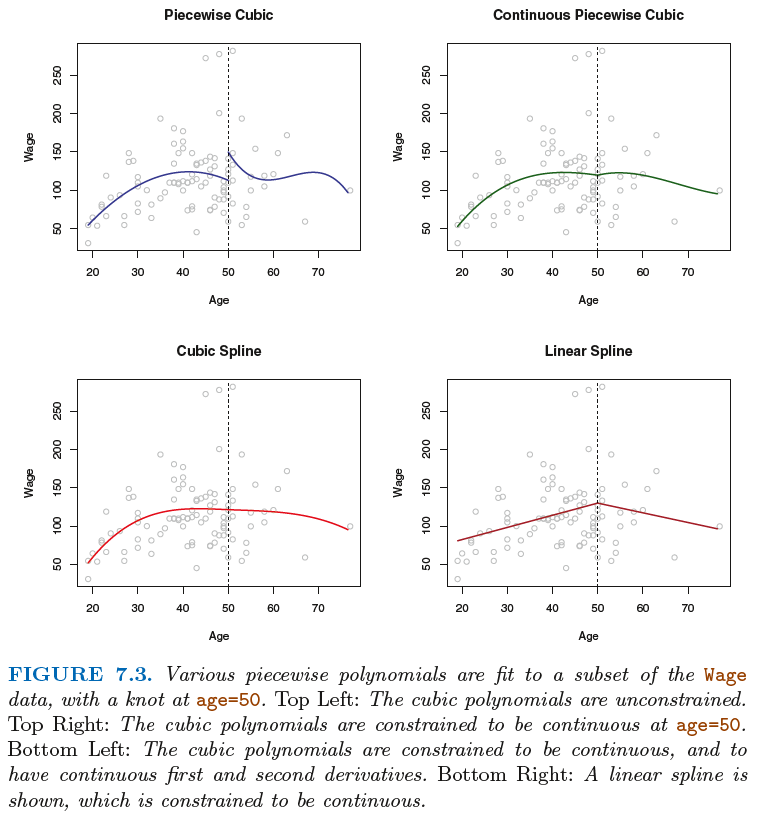

In [ ]:
Image('images/pw54.png', width =700)

## Smoothing splines Âπ≥ÊªëÊ†∑Êù°Á∫ø
+ Finding a function that minimizes RSS but 'smooth'.
+ Smoothness here is defined as having a relatively stable second derivative.
+ We want to find the smoothing spline, $g$, that minimizes
$$\sum_{i=1}^n{(y_i - g(x_i))^2} + \lambda \int{g^{\prime \prime}(t)^2 dt}$$
+ The first term is a *loss function* that encourages g to fit the data well.
+ The second term is a penalty term that penalize the variability in $g$.
+ Larger tuning parameter,$\lambda$, will make $g$ smoother.
+ The function that minimizes this error is a natural cubic spline with knots at each unique value of x but with shrunken parameter estimates due to the penalty term.
+ The tuning (smoothing) parameter is very important to control variance. Choose smoothing parameter with CV.
+ Effective degrees of freedom, $df_\lambda$, is a measure of the flexibility of the smoothing spline (higher $df_\lambda$ -> more flexible(low bias, high variance)).


+ ÂØªÊâæ‰∏Ä‰∏™ÊúÄÂ∞èÂåñ RSS ‰ΩÜ‚ÄúÂπ≥Êªë‚ÄùÁöÑÂáΩÊï∞„ÄÇ
+ ËøôÈáåÁöÑÂπ≥ÊªëÂ∫¶ÂÆö‰πâ‰∏∫ÂÖ∑ÊúâÁõ∏ÂØπÁ®≥ÂÆöÁöÑ‰∫åÈò∂ÂØºÊï∞„ÄÇ
+ Êàë‰ª¨Â∏åÊúõÊâæÂà∞ÊúÄÂ∞èÂåñ
$$\sum_{i=1}^n{(y_i - g(x_i))^2} + \lambda \int{g^{\prime \prime}(t)^2 dt}$$
+ Á¨¨‰∏Ä‰∏™È°πÊòØ *ÊçüÂ§±ÂáΩÊï∞*ÔºåÂÆÉÈºìÂä± g ÂæàÂ•ΩÂú∞ÊãüÂêàÊï∞ÊçÆ„ÄÇ
+ Á¨¨‰∫å‰∏™È°πÊòØÊÉ©ÁΩöÈ°πÔºåÂÆÉÊÉ©ÁΩö $g$ ‰∏≠ÁöÑÂèØÂèòÊÄß„ÄÇ
+ Êõ¥Â§ßÁöÑË∞ÉÊï¥ÂèÇÊï∞ $\lambda$ Â∞Ü‰Ωø $g$ Êõ¥Âπ≥Êªë„ÄÇ
+ ÊúÄÂ∞èÂåñÊ≠§ÈîôËØØÁöÑÂáΩÊï∞ÊòØËá™ÁÑ∂‰∏âÊ¨°Ê†∑Êù°ÂáΩÊï∞ÔºåÂú®ÊØè‰∏™ÂîØ‰∏Ä x ÂÄºÂ§ÑÈÉΩÊúâÁªìÁÇπÔºå‰ΩÜÁî±‰∫éÊÉ©ÁΩöÈ°πÔºåÂèÇÊï∞‰º∞ËÆ°ÂÄº‰ºöÁº©Â∞è„ÄÇ
+ Ë∞ÉÊï¥ÔºàÂπ≥ÊªëÔºâÂèÇÊï∞ÂØπ‰∫éÊéßÂà∂ÊñπÂ∑ÆÈùûÂ∏∏ÈáçË¶Å„ÄÇ‰ΩøÁî® CV ÈÄâÊã©Âπ≥ÊªëÂèÇÊï∞„ÄÇ
+ ÊúâÊïàËá™Áî±Â∫¶ $df_\lambda$ ÊòØÂπ≥ÊªëÊ†∑Êù°Êõ≤Á∫øÁÅµÊ¥ªÊÄßÁöÑÂ∫¶ÈáèÔºà$df_\lambda$ Ë∂äÈ´ò -> Ë∂äÁÅµÊ¥ªÔºà‰ΩéÂÅèÂ∑ÆÔºåÈ´òÊñπÂ∑ÆÔºâÔºâ„ÄÇ


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

# Read in the data
df = pd.read_csv('/content/wage.csv')

# Generate a sequence of age values spanning the range ÁîüÊàê‰∏ÄÁ≥ªÂàóË∑®Ë∂äËåÉÂõ¥ÁöÑÂπ¥ÈæÑÂÄº
age_grid = np.arange(df.age.min(), df.age.max()).reshape(-1,1)

+ In order to fit regression splines in python, we use the ${\tt dmatrix}$ module from the ${\tt patsy}$ library.
+ Regression splines can be fit by constructing an appropriate matrix of basis functions.
+ The ${\tt bs()}$ function generates the entire matrix of basis functions for splines with the specified set of knots.  
+ Fitting ${\tt wage}$ to ${\tt age}$ using a regression spline is simple:
+ ‰∏∫‰∫ÜÂú® Python ‰∏≠ÊãüÂêàÂõûÂΩíÊ†∑Êù°ÔºåÊàë‰ª¨‰ΩøÁî®‰∫Ü ${\tt patsy}$ Â∫ì‰∏≠ÁöÑ ${\tt dmatrix}$ Ê®°Âùó„ÄÇ
+ ÂèØ‰ª•ÈÄöËøáÊûÑÂª∫ÈÄÇÂΩìÁöÑÂü∫ÂáΩÊï∞Áü©ÈòµÊù•ÊãüÂêàÂõûÂΩíÊ†∑Êù°„ÄÇ
+ ${\tt bs()}$ ÂáΩÊï∞‰∏∫ÂÖ∑ÊúâÊåáÂÆöÁªìÁÇπÈõÜÁöÑÊ†∑Êù°ÁîüÊàêÊï¥‰∏™Âü∫ÂáΩÊï∞Áü©Èòµ„ÄÇ
+ ‰ΩøÁî®ÂõûÂΩíÊ†∑Êù°Â∞Ü ${\tt wage}$ ÊãüÂêàÂà∞ ${\tt age}$ ÂæàÁÆÄÂçïÔºö

In [ ]:
# Fitting  wage  to  age  using a regression spline
# ‰ΩøÁî®ÂõûÂΩíÊ†∑Êù°ÂáΩÊï∞ÊãüÂêàÂ∑•ËµÑ‰∏éÂπ¥ÈæÑ

from patsy import dmatrix

# Specifying 3 knots  ÊåáÂÆö 3 ËäÇ
transformed_x1 = dmatrix("bs(df.age, knots=(25,40,60), degree=3, include_intercept=False)",
                        {"df.age": df.age}, return_type='dataframe')

# Build a regular linear model from the splines  Ê†πÊçÆÊ†∑Êù°Êõ≤Á∫øÊûÑÂª∫Â∏∏ËßÑÁ∫øÊÄßÊ®°Âûã
fit1 = sm.GLM(df.wage, transformed_x1).fit()
fit1.params

Intercept                                                               60.493714
bs(df.age, knots=(25, 40, 60), degree=3, include_intercept=False)[0]     3.980500
bs(df.age, knots=(25, 40, 60), degree=3, include_intercept=False)[1]    44.630980
bs(df.age, knots=(25, 40, 60), degree=3, include_intercept=False)[2]    62.838788
bs(df.age, knots=(25, 40, 60), degree=3, include_intercept=False)[3]    55.990830
bs(df.age, knots=(25, 40, 60), degree=3, include_intercept=False)[4]    50.688098
bs(df.age, knots=(25, 40, 60), degree=3, include_intercept=False)[5]    16.606142
dtype: float64

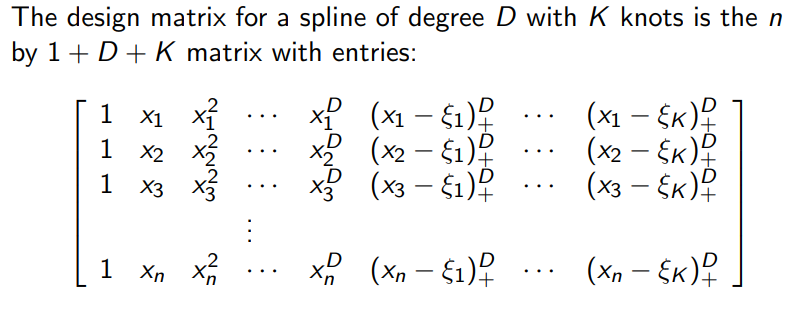

In [ ]:
Image('images/pw57.png', width =600)


+ Here we have prespecified knots at ages 25, 40, and 60.
+ This produces a spline with six basis functions. (Recall that a cubic spline with three knots has seven degrees of freedom; these degrees of freedom are used up by an intercept, plus six basis functions.)
+ We could also use the ${\tt df}$ option to produce a spline with knots at uniform quantiles of the data:
+ ËøôÈáåÊàë‰ª¨È¢ÑÂÖàÊåáÂÆö‰∫Ü 25„ÄÅ40 Âíå 60 Â≤ÅÁöÑËäÇÁÇπ„ÄÇ
+ Ëøô‰ºö‰∫ßÁîü‰∏Ä‰∏™ÂÖ∑ÊúâÂÖ≠‰∏™Âü∫ÂáΩÊï∞ÁöÑÊ†∑Êù°Á∫ø„ÄÇÔºàÂõûÊÉ≥‰∏Ä‰∏ãÔºåÂÖ∑Êúâ‰∏â‰∏™ËäÇÁÇπÁöÑ‰∏âÊ¨°Ê†∑Êù°Á∫øÂÖ∑Êúâ‰∏É‰∏™Ëá™Áî±Â∫¶ÔºõËøô‰∫õËá™Áî±Â∫¶Ë¢´Êà™Ë∑ùÂíåÂÖ≠‰∏™Âü∫ÂáΩÊï∞Áî®Â∞Ω„ÄÇÔºâ
+ Êàë‰ª¨ËøòÂèØ‰ª•‰ΩøÁî® ${\tt df}$ ÈÄâÈ°πÊù•ÁîüÊàê‰∏Ä‰∏™Âú®Êï∞ÊçÆÂùáÂåÄÂàÜ‰ΩçÊï∞Â§ÑÂÖ∑ÊúâËäÇÁÇπÁöÑÊ†∑Êù°Á∫øÔºö

In [ ]:
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   wage   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2993
Model Family:                Gaussian   Df Model:                            6
Link Function:               Identity   Scale:                          1594.0
Method:                          IRLS   Log-Likelihood:                -15314.
Date:                Tue, 07 May 2024   Deviance:                   4.7708e+06
Time:                        04:10:25   Pearson chi2:                 4.77e+06
No. Iterations:                     3   Pseudo R-squ. (CS):            0.09006
Covariance Type:            nonrobust                                         
========================================================================================================================================
                                                                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                               60.4937      9.460      6.394      0.000      41.952      79.036
bs(df.age, knots=(25, 40, 60), degree=3, include_intercept=False)[0]     3.9805     12.538      0.317      0.751     -20.593      28.554
bs(df.age, knots=(25, 40, 60), degree=3, include_intercept=False)[1]    44.6310      9.626      4.636      0.000      25.764      63.498
bs(df.age, knots=(25, 40, 60), degree=3, include_intercept=False)[2]    62.8388     10.755      5.843      0.000      41.759      83.919
bs(df.age, knots=(25, 40, 60), degree=3, include_intercept=False)[3]    55.9908     10.706      5.230      0.000      35.007      76.975
bs(df.age, knots=(25, 40, 60), degree=3, include_intercept=False)[4]    50.6881     14.402      3.520      0.000      22.461      78.915
bs(df.age, knots=(25, 40, 60), degree=3, include_intercept=False)[5]    16.6061     19.126      0.868      0.385     -20.881      54.093
========================================================================================================================================
"""

In [ ]:
# Use the df  option to produce a spline with knots at uniform quantiles of the data:
# ‰ΩøÁî® df ÈÄâÈ°πÁîüÊàêÂú®Êï∞ÊçÆÂùáÂåÄÂàÜ‰ΩçÊï∞Â§ÑÊúâÁªìÁÇπÁöÑÊ†∑Êù°Êõ≤Á∫øÔºö
# Specifying 6 degrees of freedom ÊåáÂÆö 6 ‰∏™Ëá™Áî±Â∫¶

transformed_x2 = dmatrix("bs(df.age, df=6, include_intercept=False)",
                        {"df.age": df.age}, return_type='dataframe')
fit2 = sm.GLM(df.wage, transformed_x2).fit()
fit2.params

Intercept                                       56.313841
bs(df.age, df=6, include_intercept=False)[0]    27.824002
bs(df.age, df=6, include_intercept=False)[1]    54.062546
bs(df.age, df=6, include_intercept=False)[2]    65.828391
bs(df.age, df=6, include_intercept=False)[3]    55.812734
bs(df.age, df=6, include_intercept=False)[4]    72.131473
bs(df.age, df=6, include_intercept=False)[5]    14.750876
dtype: float64

In [ ]:
transformed_x2.head(10)

Intercept  bs(df.age, df=6, include_intercept=False)[0]  \
0        1.0                                      0.000000   
1        1.0                                      0.537145   
2        1.0                                      0.000000   
3        1.0                                      0.000000   
4        1.0                                      0.000000   
5        1.0                                      0.000000   
6        1.0                                      0.000000   
7        1.0                                      0.324371   
8        1.0                                      0.000210   
9        1.0                                      0.000000   

   bs(df.age, df=6, include_intercept=False)[1]  \
0                                      0.000000   
1                                      0.208308   
2                                      0.042161   
3                                      0.099937   
4                                      0.000195   
5                                      0.000000   
6                                      0.066950   
7                                      0.523603   
8                                      0.194417   
9                                      0.000000   

   bs(df.age, df=6, include_intercept=False)[2]  \
0                                      0.000000   
1                                      0.017316   
2                                      0.751086   
3                                      0.780172   
4                                      0.529332   
5                                      0.344847   
6                                      0.772273   
7                                      0.138528   
8                                      0.747475   
9                                      0.430706   

   bs(df.age, df=6, include_intercept=False)[3]  \
0                                      0.000000   
1                                      0.000000   
2                                      0.204676   
3                                      0.119815   
4                                      0.431076   
5                                      0.525756   
6                                      0.160162   
7                                      0.000000   
8                                      0.057897   
9                                      0.492480   

   bs(df.age, df=6, include_intercept=False)[4]  \
0                                      0.000000   
1                                      0.000000   
2                                      0.002078   
3                                      0.000077   
4                                      0.039397   
5                                      0.128290   
6                                      0.000616   
7                                      0.000000   
8                                      0.000000   
9                                      0.076774   

   bs(df.age, df=6, include_intercept=False)[5]  
0                                      0.000000  
1                                      0.000000  
2                                      0.000000  
3                                      0.000000  
4                                      0.000000  
5                                      0.001107  
6                                      0.000000  
7                                      0.000000  
8                                      0.000000  
9                                      0.000041

In [ ]:
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   wage   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2993
Model Family:                Gaussian   Df Model:                            6
Link Function:               Identity   Scale:                          1592.5
Method:                          IRLS   Log-Likelihood:                -15313.
Date:                Tue, 07 May 2024   Deviance:                   4.7662e+06
Time:                        04:10:25   Pearson chi2:                 4.77e+06
No. Iterations:                     3   Pseudo R-squ. (CS):            0.09101
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       56.3138      7.258      7.759      0.000      42.088      70.539
bs(df.age, df=6, include_intercept=False)[0]    27.8240     12.435      2.238      0.025       3.453      52.195
bs(df.age, df=6, include_intercept=False)[1]    54.0625      7.127      7.585      0.000      40.093      68.032
bs(df.age, df=6, include_intercept=False)[2]    65.8284      8.323      7.909      0.000      49.515      82.142
bs(df.age, df=6, include_intercept=False)[3]    55.8127      8.724      6.398      0.000      38.714      72.911
bs(df.age, df=6, include_intercept=False)[4]    72.1315     13.745      5.248      0.000      45.192      99.071
bs(df.age, df=6, include_intercept=False)[5]    14.7509     16.209      0.910      0.363     -17.018      46.519
================================================================================================================
"""

+ In this case python chooses knots which correspond to the 25th, 50th, and 75th percentiles of ${\tt age}$.
+ The function ${\tt bs()}$ also has a ${\tt degree}$ argument, so we can fit splines of any degree, rather than the
default degree of 3 (which yields a cubic spline).

+ In order to instead fit a natural spline, we use the ${\tt cr()}$ function.
+ Here we fit a natural spline with four degrees of freedom:
+ Âú®ËøôÁßçÊÉÖÂÜµ‰∏ãÔºåpython ÈÄâÊã©‰∏é ${\tt age}$ ÁöÑÁ¨¨ 25„ÄÅ50 Âíå 75 ‰∏™ÁôæÂàÜ‰ΩçÊï∞Áõ∏ÂØπÂ∫îÁöÑÁªìÁÇπ„ÄÇ
+ ÂáΩÊï∞ ${\tt bs()}$ ‰πüÊúâ‰∏Ä‰∏™ ${\tt degree}$ ÂèÇÊï∞ÔºåÂõ†Ê≠§Êàë‰ª¨ÂèØ‰ª•ÊãüÂêà‰ªªÊÑèÊ¨°Êï∞ÁöÑÊ†∑Êù°Êõ≤Á∫øÔºåËÄå‰∏çÊòØÈªòËÆ§Ê¨°Êï∞ 3Ôºà‰∫ßÁîü‰∏âÊ¨°Ê†∑Êù°Êõ≤Á∫øÔºâ„ÄÇ

+ ‰∏∫‰∫ÜÊãüÂêàËá™ÁÑ∂Ê†∑Êù°Êõ≤Á∫øÔºåÊàë‰ª¨‰ΩøÁî® ${\tt cr()}$ ÂáΩÊï∞„ÄÇ
+ Âú®ËøôÈáåÔºåÊàë‰ª¨ÊãüÂêà‰∫ÜÂÖ∑ÊúâÂõõ‰∏™Ëá™Áî±Â∫¶ÁöÑËá™ÁÑ∂Ê†∑Êù°Êõ≤Á∫øÔºö

In [ ]:
# To fit a natural spline, we use the  ùöåùöõ() function. ‰∏∫‰∫ÜÊãüÂêàËá™ÁÑ∂Ê†∑Êù°Êõ≤Á∫øÔºåÊàë‰ª¨‰ΩøÁî®ùöåùöõ() ÂáΩÊï∞„ÄÇ
# Specifying 4 degrees of freedom ÊåáÂÆö 4 ‰∏™Ëá™Áî±Â∫¶

transformed_x3 = dmatrix("cr(df.age, df=4)", {"df.age": df.age}, return_type='dataframe')
fit3 = sm.GLM(df.wage, transformed_x3).fit()
fit3.params

Intercept              79.642095
cr(df.age, df=4)[0]   -14.667784
cr(df.age, df=4)[1]    36.811142
cr(df.age, df=4)[2]    35.934874
cr(df.age, df=4)[3]    21.563863
dtype: float64

In [ ]:
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   wage   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2996
Model Family:                Gaussian   Df Model:                            3
Link Function:               Identity   Scale:                          1596.4
Method:                          IRLS   Log-Likelihood:                -15318.
Date:                Tue, 07 May 2024   Deviance:                   4.7827e+06
Time:                        04:10:25   Pearson chi2:                 4.78e+06
No. Iterations:                     3   Pseudo R-squ. (CS):            0.08766
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              79.6421      1.773     44.918      0.000      76.167      83.117
cr(df.age, df=4)[0]   -14.6678      3.436     -4.269      0.000     -21.402      -7.934
cr(df.age, df=4)[1]    36.8111      1.950     18.881      0.000      32.990      40.632
cr(df.age, df=4)[2]    35.9349      2.056     17.476      0.000      31.905      39.965
cr(df.age, df=4)[3]    21.5639      6.989      3.085      0.002       7.865      35.263
=======================================================================================
"""

+ As with the ${\tt bs()}$ function, we could instead specify the knots directly using the ${\tt knots}$ option.

+ Let's see how these three models stack up:

+ ‰∏é ${\tt bs()}$ ÂáΩÊï∞‰∏ÄÊ†∑ÔºåÊàë‰ª¨ÂèØ‰ª•‰ΩøÁî® ${\tt knots}$ ÈÄâÈ°πÁõ¥Êé•ÊåáÂÆöÁªìÁÇπ„ÄÇ

+ ËÆ©Êàë‰ª¨ÁúãÁúãËøô‰∏â‰∏™Ê®°ÂûãÂ¶Ç‰ΩïÂè†Âä†Ôºö

Text(0, 0.5, 'wage')

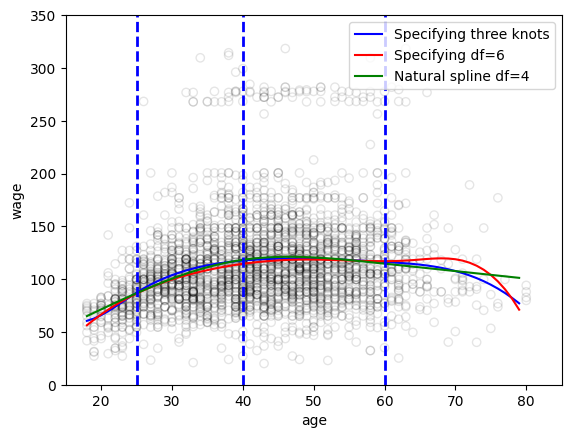

In [ ]:
# Generate a sequence of age values spanning the range ÁîüÊàê‰∏ÄÁ≥ªÂàóË∑®Ë∂äËåÉÂõ¥ÁöÑÂπ¥ÈæÑÂÄº
age_grid = np.arange(df.age.min(), df.age.max()).reshape(-1,1)

# Make some predictions ÂÅöÂá∫‰∏Ä‰∫õÈ¢ÑÊµã
pred1 = fit1.predict(dmatrix("bs(age_grid, knots=(25,40,60), include_intercept=False)",
                             {"age_grid": age_grid}, return_type='dataframe'))
pred2 = fit2.predict(dmatrix("bs(age_grid, df=6, include_intercept=False)",
                             {"age_grid": age_grid}, return_type='dataframe'))
pred3 = fit3.predict(dmatrix("cr(age_grid, df=4)", {"age_grid": age_grid}, return_type='dataframe'))

# Plot the splines and error bands ÁªòÂà∂Ê†∑Êù°Á∫øÂíåËØØÂ∑ÆÂ∏¶
plt.scatter(df.age, df.wage, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(age_grid, pred1, color='b', label='Specifying three knots')
plt.plot(age_grid, pred2, color='r', label='Specifying df=6')
plt.plot(age_grid, pred3, color='g', label='Natural spline df=4')
[plt.vlines(i , 0, 350, linestyles='dashed', lw=2, colors='b') for i in [25,40,60]]
plt.legend()
plt.xlim(15,85)
plt.ylim(0,350)
plt.xlabel('age')
plt.ylabel('wage')

## Local Regression Â±ÄÈÉ®ÂõûÂΩí
+ Fits a new regression line to each point by using the nearest neighbors of that point.
+ It uses weighted least squares, weighing points at the boundary and beyond 0 and points in the boundary a decreasing function of its distance to the point.
+ Usually, small degree polynomials are fit to these local points.
+ Need to choose weight function and span, $s$ of points.
+ Larger span of points the smoother function you will get.
1. Gather the fraction, $s=k/n$ of training points whose $x_i$ are closest to $x_0$.
2. Assign a weight $K_{i0} = K(x_i, x_0)$ to each point in the neighbourhood. All but these $k$ nearest neighbors get weight zero.
3. Fit a weighted least squares regression of the $y_i$ on the $x_i$, by finding $\hat{\beta}_0$ and $\hat{\beta}_1$ that minimize
$$\sum_{i=1}^n{K_{i0}(y_i - \beta_0 - \beta_1x_i)^2}$$
4. The fitted value at $x_0$ is $$\hat{f}(x_0) = \hat{\beta}_0 + \hat{\beta}_1x_0$$
+ Can even do local regression with pairs or more of variables but because of the curse of dimensionality, there might not be enough neighbors.



+ ‰ΩøÁî®ËØ•ÁÇπÁöÑÊúÄËøëÈÇª‰∏∫ÊØè‰∏™ÁÇπÊãüÂêà‰∏ÄÊù°Êñ∞ÁöÑÂõûÂΩíÁ∫ø„ÄÇ
+ ÂÆÉ‰ΩøÁî®Âä†ÊùÉÊúÄÂ∞è‰∫å‰πòÊ≥ïÔºåÂØπËæπÁïåÂ§ÑÂíå 0 ‰ª•Â§ñÁöÑÁÇπËøõË°åÂä†ÊùÉÔºåÂØπËæπÁïåÂÜÖÁöÑÁÇπËøõË°åÂä†ÊùÉÔºå‰ΩøÂÖ∂‰∏éËØ•ÁÇπÁöÑË∑ùÁ¶ªÂëàÈÄíÂáèÂáΩÊï∞„ÄÇ
+ ÈÄöÂ∏∏ÔºåÂ∞èÊ¨°Êï∞Â§öÈ°πÂºèÈÄÇÂêàËøô‰∫õÂ±ÄÈÉ®ÁÇπ„ÄÇ
+ ÈúÄË¶ÅÈÄâÊã©ÊùÉÈáçÂáΩÊï∞ÂíåË∑®Â∫¶ÔºåÂç≥ÁÇπÁöÑ $s$„ÄÇ
+ ÁÇπÁöÑË∑®Â∫¶Ë∂äÂ§ßÔºåÂáΩÊï∞Ë∂äÂπ≥Êªë„ÄÇ
1. Êî∂ÈõÜ $x_i$ ÊúÄÊé•Ëøë $x_0$ ÁöÑËÆ≠ÁªÉÁÇπÁöÑÂàÜÊï∞Ôºå$s=k/n$„ÄÇ
2. ‰∏∫ÈÇªÂüü‰∏≠ÁöÑÊØè‰∏™ÁÇπÂàÜÈÖçÊùÉÈáç $K_{i0} = K(x_i, x_0)$„ÄÇÈô§‰∫ÜËøô $k$ ‰∏™ÊúÄËøëÈÇª‰πãÂ§ñÔºåÊâÄÊúâÁÇπÁöÑÊùÉÈáçÂùá‰∏∫Èõ∂„ÄÇ
3. ÈÄöËøáÊâæÂà∞ÊúÄÂ∞èÂåñ
$$\sum_{i=1}^n{K_{i0}(y_i - \beta_0 - \beta_1x_i)^2}$$ÁöÑ$\hat{\beta}_0$Âíå$\hat{\beta}_1$ÔºåÂØπ$y_i$ËøõË°åÂä†ÊùÉÊúÄÂ∞è‰∫å‰πòÂõûÂΩí„ÄÇ
4. $x_0$Â§ÑÁöÑÊãüÂêàÂÄº‰∏∫$$\hat{f}(x_0) = \hat{\beta}_0 + \hat{\beta}_1x_0$$
+ ÁîöËá≥ÂèØ‰ª•ÂØπÊàêÂØπÊàñÊõ¥Â§öÂèòÈáèËøõË°åÂ±ÄÈÉ®ÂõûÂΩíÔºå‰ΩÜÁî±‰∫éÁª¥Êï∞ÁÅæÈöæÔºåÂèØËÉΩÊ≤°ÊúâË∂≥Â§üÁöÑÈÇªÂ±Ö„ÄÇ



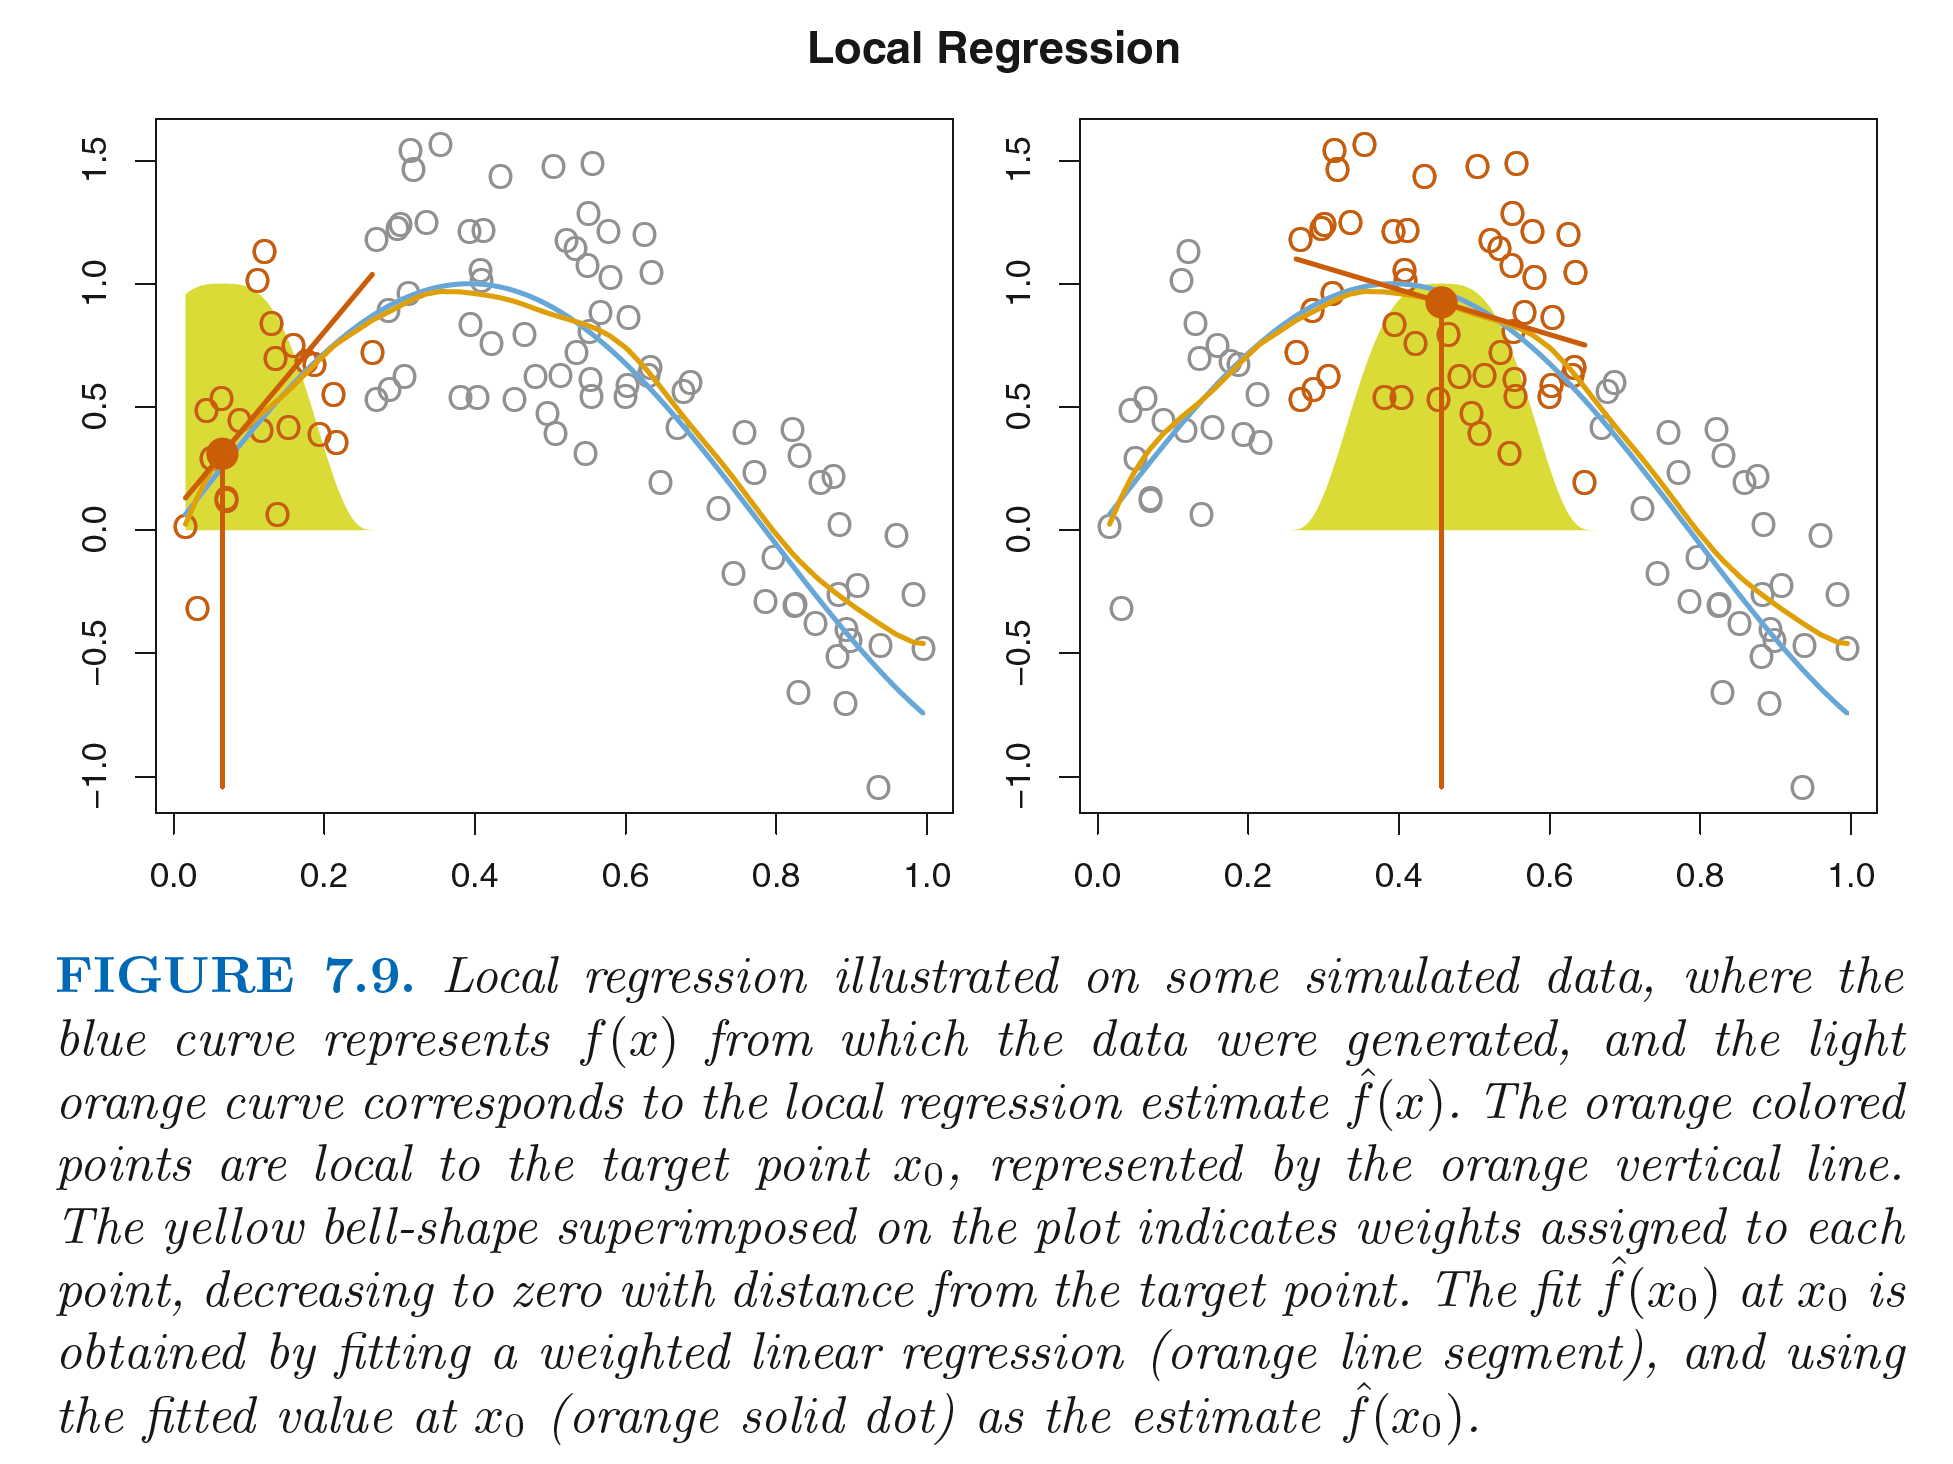

In [ ]:
Image('images/pw55.png', width =700)

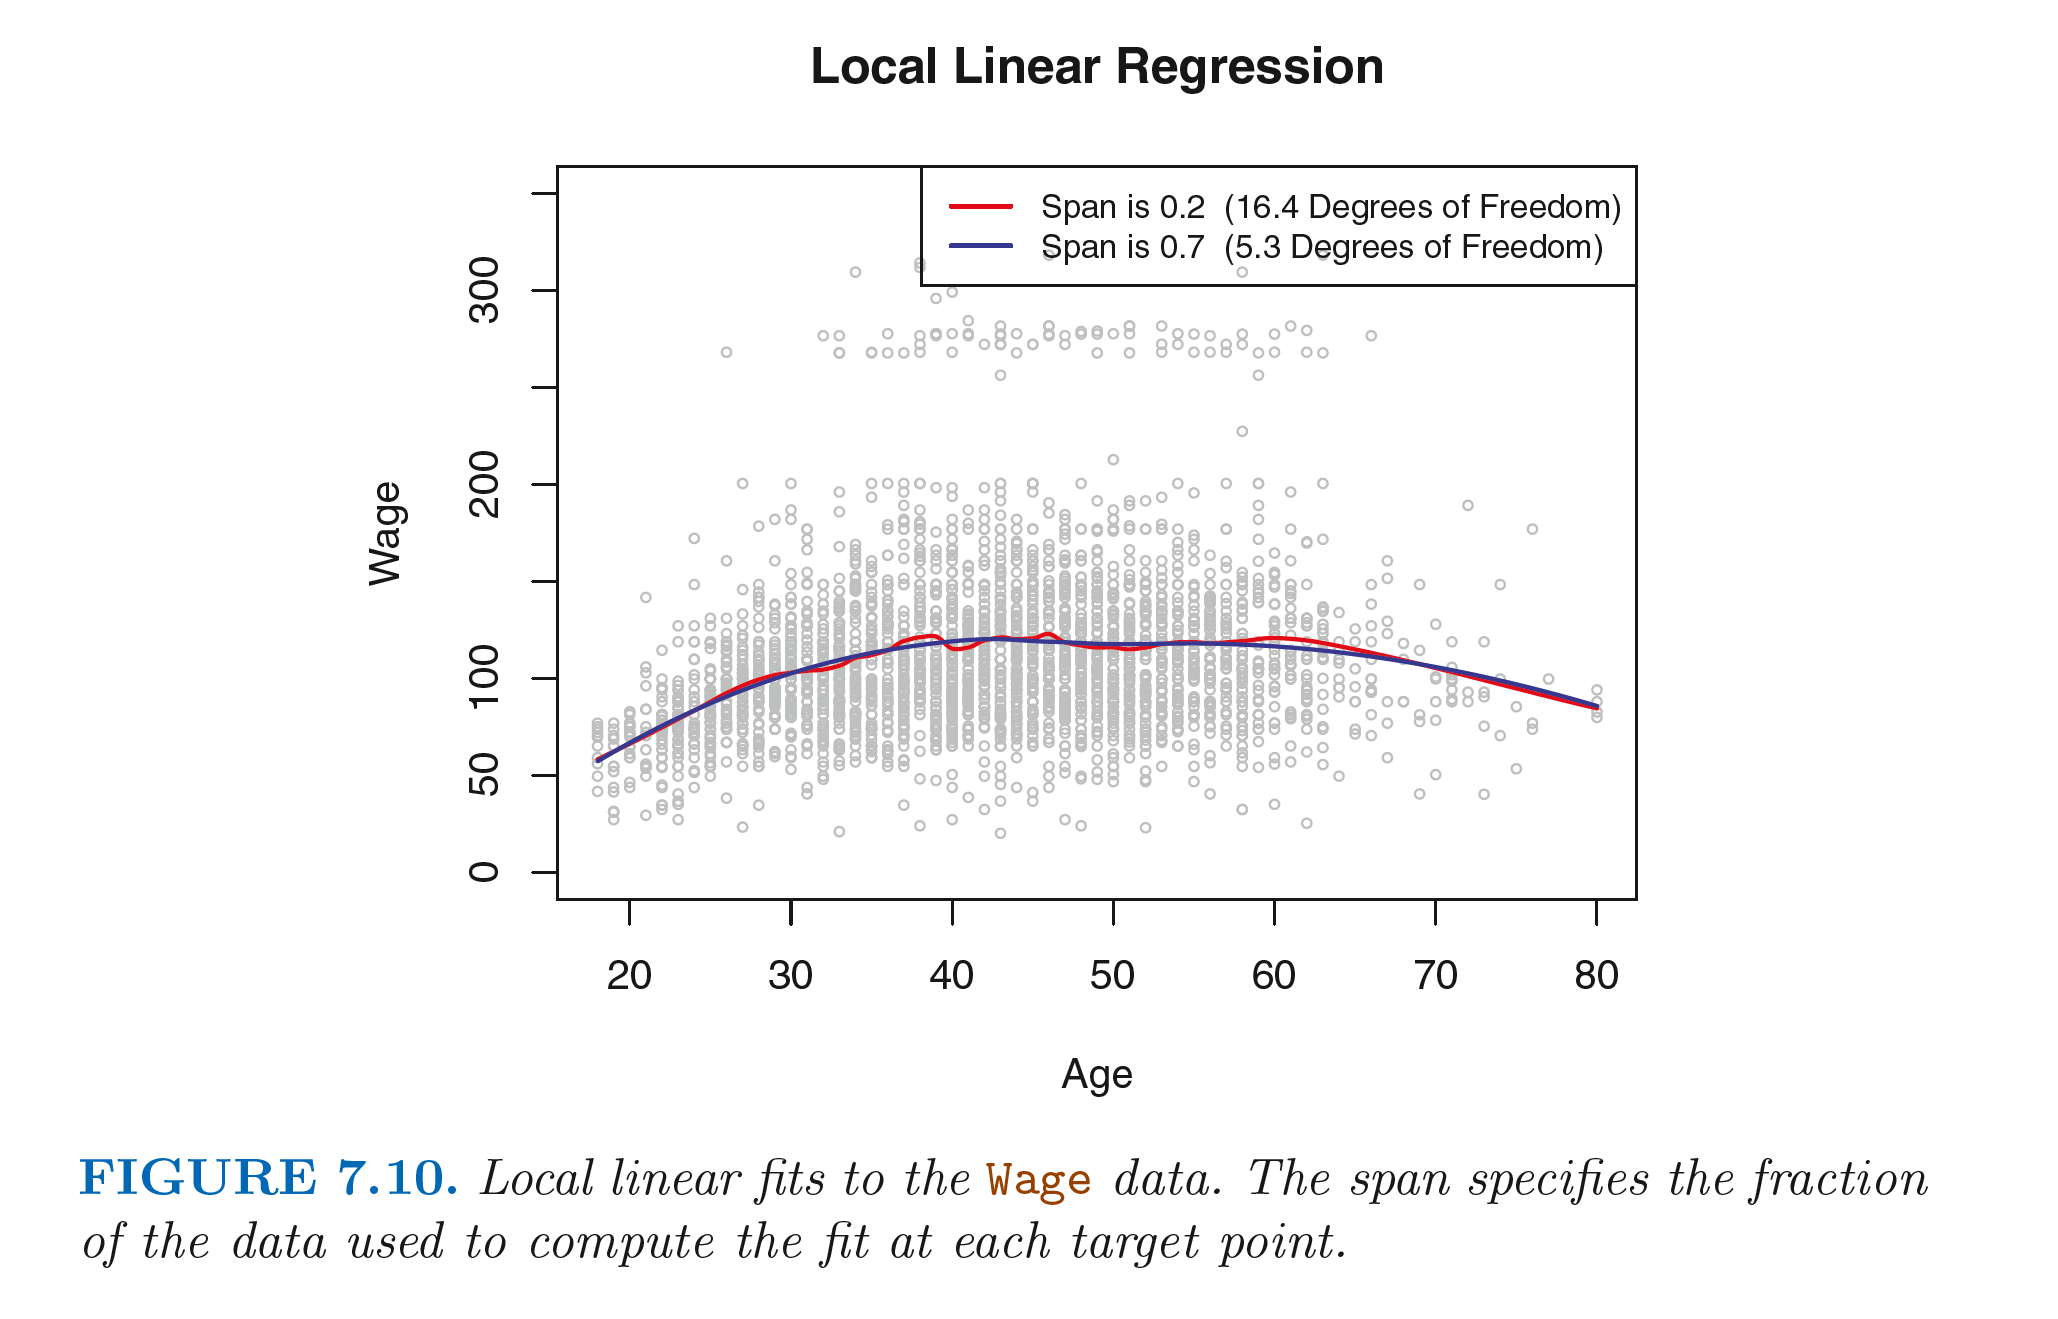

In [ ]:
Image('images/pw56.png', width =700)

## General Additive Models ÈÄöÁî®Âä†ÊÄßÊ®°Âûã
+ All the previous models all relate to single variable predictions.
+ GAMs simply add different linear models above (like the ones above) for different variables in the model, allowing for multivariate regression/classification.
+ Each variable gets its own model and is added together.
+ Each own model is a building block for a GAM.
+ ÊâÄÊúâÂÖàÂâçÁöÑÊ®°ÂûãÈÉΩ‰∏éÂçïÂèòÈáèÈ¢ÑÊµãÊúâÂÖ≥„ÄÇ
+ GAM Âè™ÊòØ‰∏∫Ê®°Âûã‰∏≠ÁöÑ‰∏çÂêåÂèòÈáèÊ∑ªÂä†‰∏çÂêåÁöÑÁ∫øÊÄßÊ®°ÂûãÔºàÂ¶Ç‰∏äÂõæÊâÄÁ§∫ÔºâÔºå‰ªéËÄåÂÆûÁé∞Â§öÂÖÉÂõûÂΩí/ÂàÜÁ±ª„ÄÇ
+ ÊØè‰∏™ÂèòÈáèÈÉΩÊúâËá™Â∑±ÁöÑÊ®°ÂûãÔºåÂπ∂Â∞ÜÂÆÉ‰ª¨Âä†Âú®‰∏ÄËµ∑„ÄÇ
+ ÊØè‰∏™Ëá™Â∑±ÁöÑÊ®°ÂûãÈÉΩÊòØ GAM ÁöÑÊûÑÂª∫Âùó„ÄÇ

### GAM for regression Áî®‰∫éÂõûÂΩíÁöÑGAM
$$y_i = \beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + \ldots + \beta_px_{ip} + \epsilon_i$$
+ Replace each linear component, $\beta_j x_{ij}$, with a smooth nonlinear function, $f_j (x_{ij})$,
$$ y_i = \beta_0 + f_1(x_{i1}) + \ldots + f_p(x_{ip}) + \epsilon_i$$
+ GAM can use the previous methods as building blocks for fitting an additive model.
+ The main limitation of GAMs is that the model is restricted to be additive. With many variables, important interactions can be missed.
+ However, we can manually add interaction terms by including additional predictors of the form $X_j \times X_k$.
+ Or, we can add low-dimensional interaction functions of the form $f_{jk}(X_j,X_k)$ into the model using two-dimensional smoothers such as local regression, or two-dimensional splines.
+ The same technique can also be used for classification problems.


$$y_i = \beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + \ldots + \beta_px_{ip} + \epsilon_i$$
+ Â∞ÜÊØè‰∏™Á∫øÊÄßÂàÜÈáè $\beta_j x_{ij}$ ÊõøÊç¢‰∏∫Âπ≥ÊªëÈùûÁ∫øÊÄßÂáΩÊï∞ $f_j (x_{ij})$Ôºå
$$ y_i = \beta_0 + f_1(x_{i1}) + \ldots + f_p(x_{ip}) + \epsilon_i$$
+ GAM ÂèØ‰ª•‰ΩøÁî®‰ª•ÂâçÁöÑÊñπÊ≥ï‰Ωú‰∏∫ÊãüÂêàÂä†ÊÄßÊ®°ÂûãÁöÑÊûÑÂª∫Âùó„ÄÇ
+ GAM ÁöÑ‰∏ªË¶ÅÈôêÂà∂ÊòØÊ®°Âûã‰ªÖÈôê‰∫éÂä†ÊÄß„ÄÇÂ¶ÇÊûúÂèòÈáèÂæàÂ§öÔºåÂèØËÉΩ‰ºöÈÅóÊºèÈáçË¶ÅÁöÑÁõ∏‰∫í‰ΩúÁî®„ÄÇ
+ ‰ΩÜÊòØÔºåÊàë‰ª¨ÂèØ‰ª•ÈÄöËøáÊ∑ªÂä†ÂΩ¢Âºè‰∏∫ $X_j \times X_k$ ÁöÑÂÖ∂‰ªñÈ¢ÑÊµãÂõ†Â≠êÊù•ÊâãÂä®Ê∑ªÂä†‰∫§‰∫íÈ°π„ÄÇ
+ ÊàñËÄÖÔºåÊàë‰ª¨ÂèØ‰ª•‰ΩøÁî®‰∫åÁª¥Âπ≥ÊªëÂô®Ôºà‰æãÂ¶ÇÂ±ÄÈÉ®ÂõûÂΩíÔºâÊàñ‰∫åÁª¥Ê†∑Êù°ÂáΩÊï∞Â∞ÜÂΩ¢Âºè‰∏∫ $f_{jk}(X_j,X_k)$ ÁöÑ‰ΩéÁª¥‰∫§‰∫íÂáΩÊï∞Ê∑ªÂä†Âà∞Ê®°Âûã‰∏≠„ÄÇ
+ ÂêåÊ†∑ÁöÑÊäÄÊúØ‰πüÂèØÁî®‰∫éÂàÜÁ±ªÈóÆÈ¢ò„ÄÇ



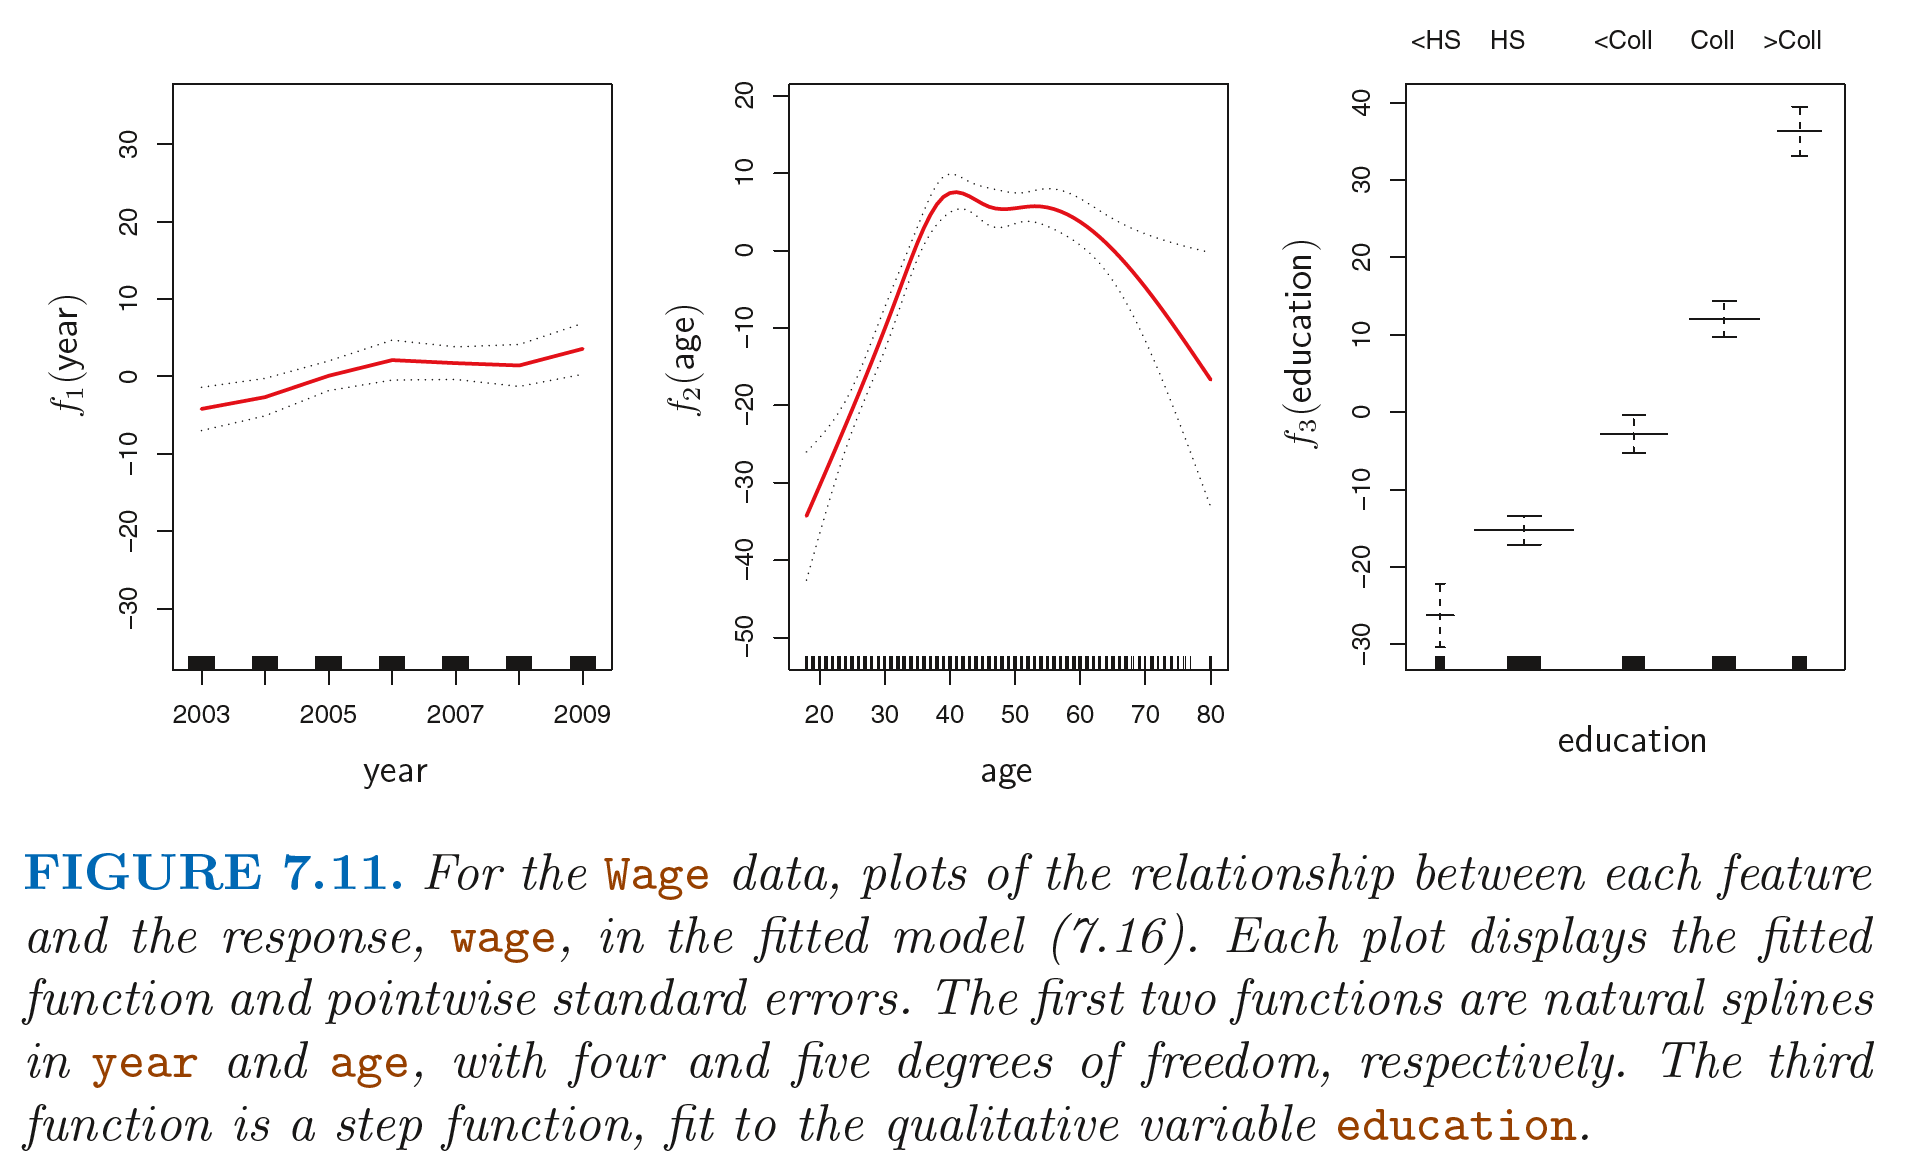

In [ ]:
Image('images/pw58.png', width =700)

# Lab 7.8.1
Recreating plot 7.1

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
wage = pd.read_csv("/content/wage.csv")

In [ ]:
# Use sklearn to get regression coefficients ‰ΩøÁî®sklearnËé∑ÂèñÂõûÂΩíÁ≥ªÊï∞
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
poly = PolynomialFeatures(degree=4, include_bias=False)

In [ ]:
X = wage[['age']]
y = wage['wage']

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(poly.fit_transform(X), y)

LinearRegression()

In [ ]:
# Coefficients are the same as in ISLR Á≥ªÊï∞‰∏é ISLR Áõ∏Âêå
model.intercept_, model.coef_

(-184.15417977343827,
 array([ 2.12455205e+01, -5.63859313e-01,  6.81068771e-03, -3.20383037e-05]))

In [ ]:
model.intercept_

-184.15417977343827

### Standard error in  Scikit-learn  Scikit-learn ‰∏≠ÁöÑÊ†áÂáÜÈîôËØØ
Sklearn doesn't supply the standard error so you'll have to write the formula yourself or use statsmodels

Sklearn ‰∏çÊèê‰æõÊ†áÂáÜÈîôËØØÔºåÂõ†Ê≠§‰Ω†ÂøÖÈ°ªËá™Â∑±ÁºñÂÜôÂÖ¨ÂºèÊàñ‰ΩøÁî® statsmodels

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
results = smf.ols('wage ~ age + np.power(age, 2) + np.power(age, 3) + np.power(age, 4)', data=wage).fit()

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     70.69
Date:                Tue, 07 May 2024   Prob (F-statistic):           2.77e-57
Time:                        04:10:28   Log-Likelihood:                -15315.
No. Observations:                3000   AIC:                         3.064e+04
Df Residuals:                    2995   BIC:                         3.067e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -184.1542     60.040     -3.067      0.002    -301.879     -66.430
age                 21.2455      5.887      3.609      0.000       9.703      32.788
np.power(age, 2)    -0.5639      0.206     -2.736      0.006      -0.968      -0.160
np.power(age, 3)     0.0068      0.003      2.221      0.026       0.001       0.013
np.power(age, 4) -3.204e-05   1.64e-05     -1.952      0.051   -6.42e-05    1.45e-07
==============================================================================
Omnibus:                     1097.594   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4965.521
Skew:                           1.722   Prob(JB):                         0.00
Kurtosis:                       8.279   Cond. No.                     5.67e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.67e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
results.bse

Intercept           60.040377
age                  5.886748
np.power(age, 2)     0.206108
np.power(age, 3)     0.003066
np.power(age, 4)     0.000016
dtype: float64

In [ ]:
results.conf_int()

0             1
Intercept        -301.878732 -6.642963e+01
age                 9.703041  3.278800e+01
np.power(age, 2)   -0.967987 -1.597312e-01
np.power(age, 3)    0.000799  1.282223e-02
np.power(age, 4)   -0.000064  1.447431e-07

### Confidence interval for the mean ÂùáÂÄºÁöÑÁΩÆ‰ø°Âå∫Èó¥
There are different confidence intervals for the mean (the regression line) and prediction. Prediction intervals are going to be much wider. The regression line will not wiggle around so much

Âπ≥ÂùáÂÄºÔºàÂõûÂΩíÁ∫øÔºâÂíåÈ¢ÑÊµãÂÄºÊúâ‰∏çÂêåÁöÑÁΩÆ‰ø°Âå∫Èó¥„ÄÇÈ¢ÑÊµãÂå∫Èó¥‰ºöÊõ¥ÂÆΩ„ÄÇÂõûÂΩíÁ∫ø‰∏ç‰ºöÊëÜÂä®Â§™Â§ö

In [ ]:
from statsmodels.stats.outliers_influence import summary_table

In [ ]:
st, data, ss2 = summary_table(results, alpha=0.05)

In [ ]:
fittedvalues = data[:,2]
predict_mean_se  = data[:,3]
predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T

In [ ]:
order = np.argsort(X.values.flatten())
x_o = X.values.flatten()[order]

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

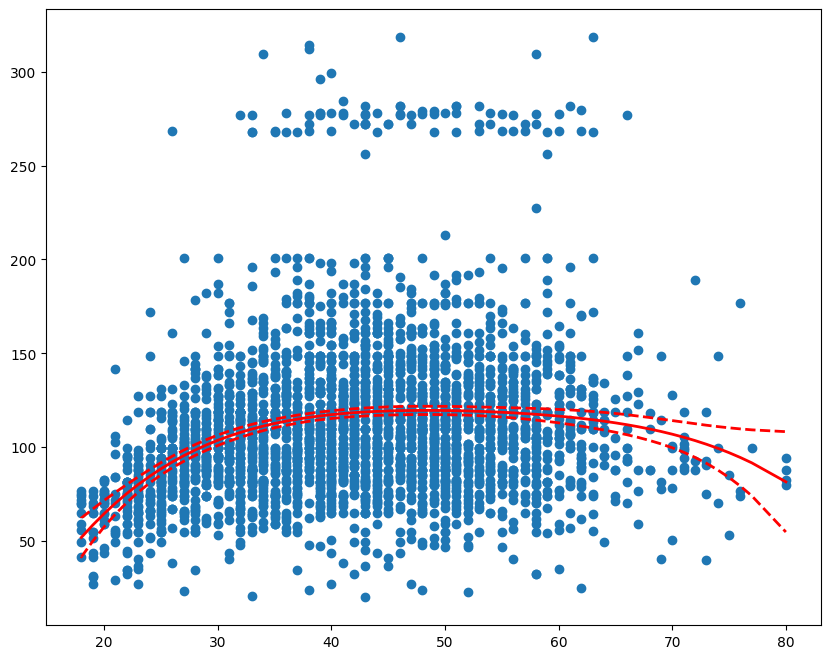

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(x_o, y[order])
plt.plot(x_o, fittedvalues[order], 'r', lw=2)
plt.plot(x_o, predict_mean_ci_low[order], 'r--', lw=2)
plt.plot(x_o, predict_mean_ci_upp[order], 'r--', lw=2)

In [ ]:
# Which features are necessary Âì™‰∫õÂäüËÉΩÊòØÂøÖÈúÄÁöÑ
smf.ols('wage ~ age + np.power(age, 2) + np.power(age, 3) + np.power(age, 4)', data=wage).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     70.69
Date:                Tue, 07 May 2024   Prob (F-statistic):           2.77e-57
Time:                        04:10:30   Log-Likelihood:                -15315.
No. Observations:                3000   AIC:                         3.064e+04
Df Residuals:                    2995   BIC:                         3.067e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -184.1542     60.040     -3.067      0.002    -301.879     -66.430
age                 21.2455      5.887      3.609      0.000       9.703      32.788
np.power(age, 2)    -0.5639      0.206     -2.736      0.006      -0.968      -0.160
np.power(age, 3)     0.0068      0.003      2.221      0.026       0.001       0.013
np.power(age, 4) -3.204e-05   1.64e-05     -1.952      0.051   -6.42e-05    1.45e-07
==============================================================================
Omnibus:                     1097.594   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4965.521
Skew:                           1.722   Prob(JB):                         0.00
Kurtosis:                       8.279   Cond. No.                     5.67e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.67e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Use Anova to test wheter each additional polynomial term is significant
‰ΩøÁî®ÊñπÂ∑ÆÂàÜÊûêÊ£ÄÈ™åÊØè‰∏™ÈôÑÂä†Â§öÈ°πÂºèÈ°πÊòØÂê¶ÊòæËëó


Models must be nested here, meaning that mod2 must be a superset of mod1


Ê®°ÂûãÂøÖÈ°ªÂú®ËøôÈáåÂµåÂ•óÔºåËøôÊÑèÂë≥ÁùÄ mod2 ÂøÖÈ°ªÊòØ mod1 ÁöÑË∂ÖÈõÜ

In [ ]:
from statsmodels.stats.api import anova_lm

In [ ]:
mod1 = smf.ols('wage ~ age', data=wage).fit()
mod2 = smf.ols('wage ~ age + np.power(age, 2)', data=wage).fit()
mod3 = smf.ols('wage ~ age + np.power(age, 2) + np.power(age, 3)', data=wage).fit()
mod4 = smf.ols('wage ~ age + np.power(age, 2) + np.power(age, 3) + np.power(age, 4)', data=wage).fit()
mod5 = smf.ols('wage ~ age + np.power(age, 2) + np.power(age, 3) + np.power(age, 4) + np.power(age, 5)', data=wage).fit()

In [ ]:
# Same as ISLR
# polynomial terms 4 and 5 are not needed. p > .05 ‰∏çÈúÄË¶ÅÂ§öÈ°πÂºèÈ°π 4 Âíå 5„ÄÇp > .05
anova_lm(mod1, mod2, mod3, mod4, mod5)

df_resid           ssr  df_diff        ss_diff           F        Pr(>F)
0    2998.0  5.022216e+06      0.0            NaN         NaN           NaN
1    2997.0  4.793430e+06      1.0  228786.010128  143.593107  2.363850e-32
2    2996.0  4.777674e+06      1.0   15755.693664    9.888756  1.679202e-03
3    2995.0  4.771604e+06      1.0    6070.152124    3.809813  5.104620e-02
4    2994.0  4.770322e+06      1.0    1282.563017    0.804976  3.696820e-01

# Logistic regression ÈÄªËæëÂõûÂΩí
Prediciton of greater than 250k in income

È¢ÑÊµãÊî∂ÂÖ•Ë∂ÖËøá 25 ‰∏á

In [ ]:
wage['wage_250'] = (wage['wage'] > 250) * 1

In [ ]:
results = smf.logit('wage_250 ~ age + np.power(age, 2) + np.power(age, 3) + np.power(age, 4)', data=wage).fit()

Optimization terminated successfully.
         Current function value: 0.116870
         Iterations 12


In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               wage_250   No. Observations:                 3000
Model:                          Logit   Df Residuals:                     2995
Method:                           MLE   Df Model:                            4
Date:                Tue, 07 May 2024   Pseudo R-squ.:                 0.04013
Time:                        04:10:31   Log-Likelihood:                -350.61
converged:                       True   LL-Null:                       -365.27
Covariance Type:            nonrobust   LLR p-value:                 6.747e-06
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -109.5530     47.655     -2.299      0.022    -202.956     -16.150
age                  8.9950      4.187      2.148      0.032       0.789      17.201
np.power(age, 2)    -0.2816      0.135     -2.081      0.037      -0.547      -0.016
np.power(age, 3)     0.0039      0.002      2.022      0.043       0.000       0.008
np.power(age, 4) -1.949e-05   9.91e-06     -1.966      0.049   -3.89e-05   -6.41e-08
====================================================================================
"""

In [ ]:
y_hat = np.exp(results.fittedvalues)
y = wage['wage_250'].values
x = X['age'].values
x_mean = x.mean()
n = len(y)

In [ ]:
sy = np.sqrt(np.sum((y - y_hat)**2) / (n - 2))
sx = np.sum((x - x_mean) ** 2) / n
x_s = (x - x_mean) ** 2

In [ ]:
sx = np.sum(x ** 2) - (x.sum() ** 2) / n

In [ ]:
err = sy * np.sqrt(1/n + x_s / x_s.sum())

In [ ]:
order = np.argsort(x)
x_o = x[order]

(0.0, 0.07)

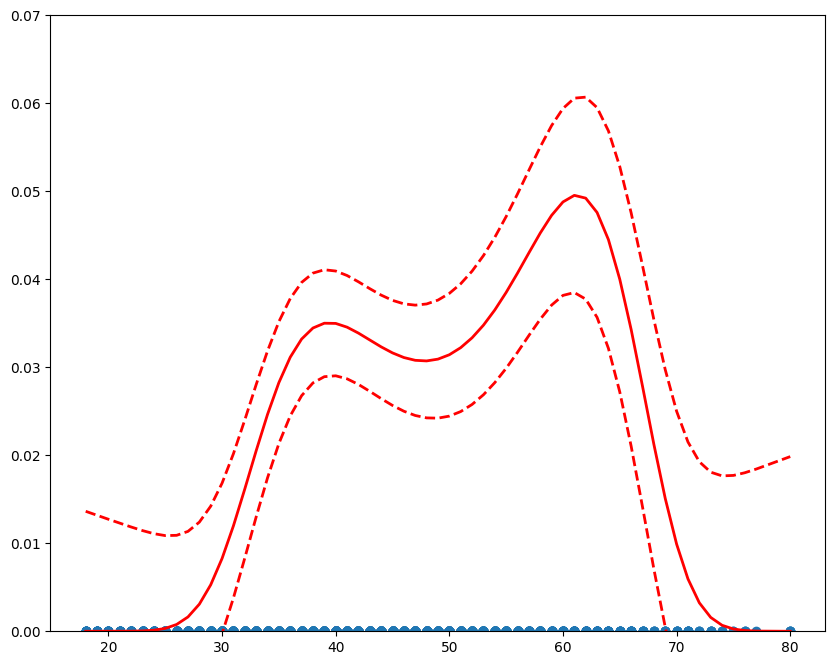

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(x_o, y[order])
plt.plot(x_o, y_hat[order], 'r', lw=2)
plt.plot(x_o, y_hat[order] + 2 * err[order], 'r--', lw=2)
plt.plot(x_o, y_hat[order] - 2 * err[order], 'r--', lw=2)
plt.ylim(0, .07)

# Step function as in 7.2
use pd.cut

In [ ]:
results = smf.ols('wage ~ pd.cut(age, 4)', data=wage).fit()

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     66.58
Date:                Tue, 07 May 2024   Prob (F-statistic):           1.13e-41
Time:                        04:10:32   Log-Likelihood:                -15353.
No. Observations:                3000   AIC:                         3.071e+04
Df Residuals:                    2996   BIC:                         3.074e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                                 94.1584      1.476     63.790      0.000      91.264      97.053
pd.cut(age, 4)[T.Interval(33.5, 49.0, closed='right')]    24.0535      1.829     13.148      0.000      20.466      27.641
pd.cut(age, 4)[T.Interval(49.0, 64.5, closed='right')]    23.6646      2.068     11.443      0.000      19.610      27.719
pd.cut(age, 4)[T.Interval(64.5, 80.0, closed='right')]     7.6406      4.987      1.532      0.126      -2.139      17.420
==============================================================================
Omnibus:                     1062.354   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4551.200
Skew:                           1.681   Prob(JB):                         0.00
Kurtosis:                       8.011   Cond. No.                         7.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Splines Ê†∑Êù°Á∫ø

In [ ]:
import scipy.interpolate as si

In [ ]:
y = wage['wage'].values

In [ ]:
order = np.argsort(x)

In [ ]:
x_sort = x[order]
y_sort = y[order]
t = np.array([25, 40, 60])

In [ ]:
spl = si.LSQUnivariateSpline(x_sort, y_sort, t)

In [ ]:
spl(x_sort)

array([60.49371419, 60.49371419, 60.49371419, ..., 77.09985645,
       77.09985645, 77.09985645])

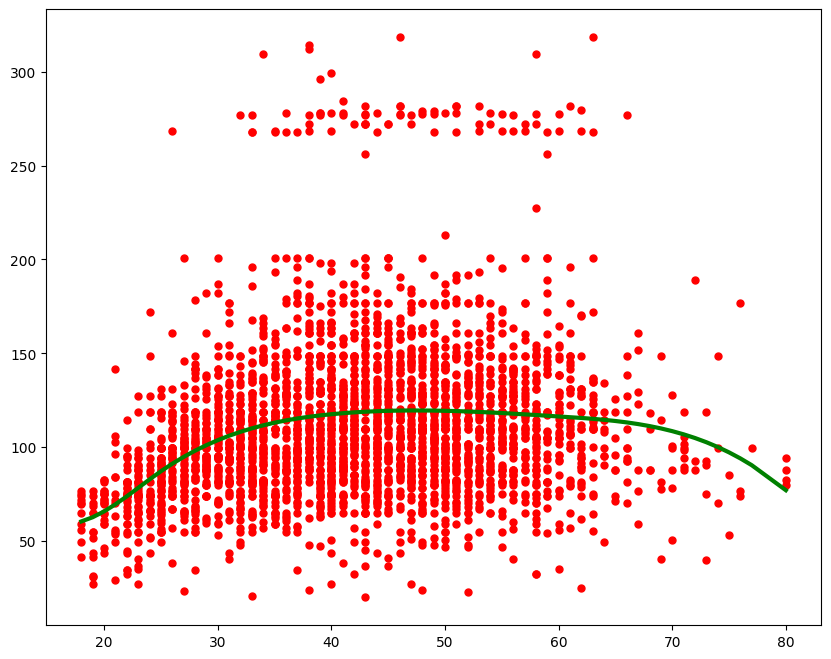

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(x_sort, y_sort, 'ro', ms=5)
plt.plot(x_sort, spl(x_sort), 'g-', lw=3);

## General additive models for classification Áî®‰∫éÂàÜÁ±ªÁöÑÈÄöÁî®Âä†ÊÄßÊ®°Âûã


In [ ]:
!pip install pygam
from pygam import LogisticGAM

This data contains 569 observations and 30 features. The target variable in this case is whether the tumor of malignant or benign, and the features are several measurements of the tumor. For showcasing purposes, we keep the first 6 features only.

ËØ•Êï∞ÊçÆÂåÖÂê´ 569 ‰∏™ËßÇÂØüÂÄºÂíå 30 ‰∏™ÁâπÂæÅ„ÄÇÊú¨‰æã‰∏≠ÁöÑÁõÆÊ†áÂèòÈáèÊòØËÇøÁò§ÊòØÊÅ∂ÊÄßËøòÊòØËâØÊÄßÔºåÁâπÂæÅÊòØËÇøÁò§ÁöÑÂ§öÊ¨°ÊµãÈáè„ÄÇÂá∫‰∫éÂ±ïÁ§∫ÁõÆÁöÑÔºåÊàë‰ª¨‰ªÖ‰øùÁïôÂâç 6 ‰∏™ÂäüËÉΩ„ÄÇ

In [ ]:
import pandas as pd

from sklearn.datasets import load_breast_cancer

#load the breast cancer data set Âä†ËΩΩ‰π≥ËÖ∫ÁôåÊï∞ÊçÆÈõÜ
data = load_breast_cancer()

#keep first 6 features only ‰ªÖ‰øùÁïôÂâç 6 ‰∏™ÁâπÂæÅ
df = pd.DataFrame(data.data, columns=data.feature_names)[['mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness', 'mean compactness']]
target_df = pd.Series(data.target)
df.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  
count       569.000000        569.000000  
mean          0.096360          0.104341  
std           0.014064          0.052813  
min           0.052630          0.019380  
25%           0.086370          0.064920  
50%           0.095870          0.092630  
75%           0.105300          0.130400  
max           0.163400          0.345400

**Since** this is a classification problem, make sure to use pyGam‚Äôs LogisticGAM() function.

**Âõ†‰∏∫**ËøôÊòØ‰∏Ä‰∏™ÂàÜÁ±ªÈóÆÈ¢òÔºåËØ∑Á°Æ‰øù‰ΩøÁî® pyGam ÁöÑ LogisticGAM() ÂáΩÊï∞„ÄÇ

In [ ]:
X = df[['mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness', 'mean compactness']]
y = target_df

#Fit a model with the default parameters ‰ΩøÁî®ÈªòËÆ§ÂèÇÊï∞ÊãüÂêàÊ®°Âûã
gam = LogisticGAM().fit(X, y)

In [ ]:
gam.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     19.4476
Link Function:                        LogitLink Log Likelihood:                                   -54.0256
Number of Samples:                          569 AIC:                                              146.9464
                                                AICc:                                             148.5483
                                                UBRE:                                               2.2856
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.8562
Feature Function                  Lam

<ipython-input-74-dec6a6acdaaa>:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


In [ ]:
gam.accuracy(X, y)

0.9560632688927944

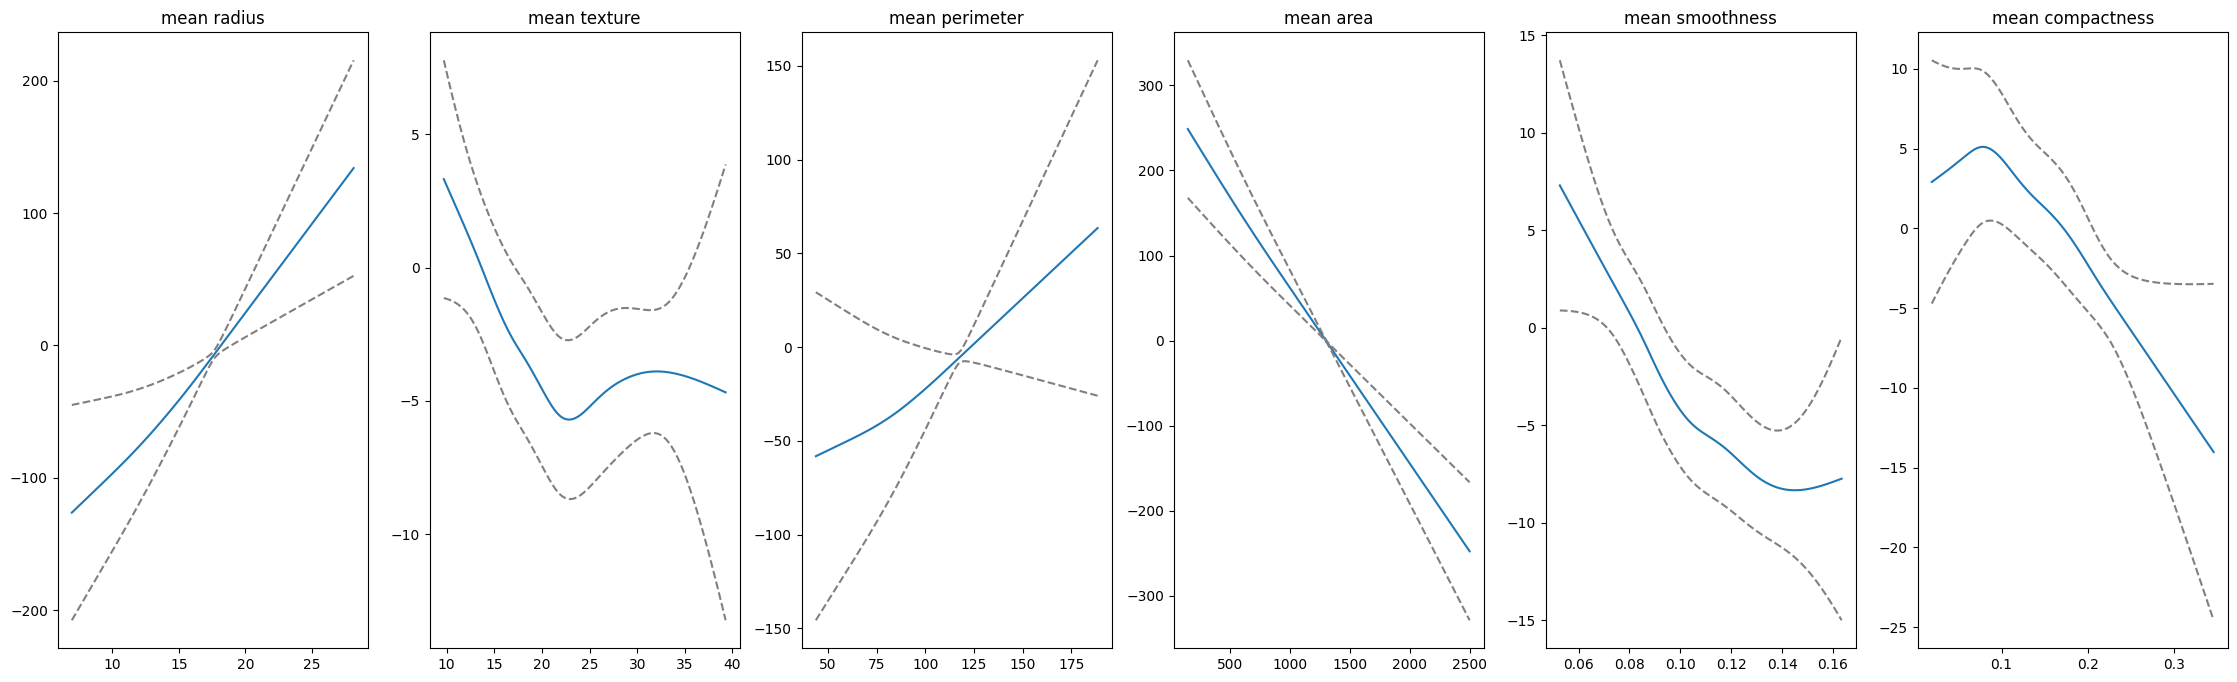

In [ ]:
plt.rcParams['figure.figsize'] = (28, 8)
fig, axs = plt.subplots(1, len(data.feature_names[0:6]))
titles = data.feature_names
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, width=.95)
    ax.plot(XX[:, i], pdep)
    ax.plot(XX[:, i], confi[:, 0], c='grey', ls='--')
    ax.plot(XX[:, i], confi[:, 1], c='grey', ls='--')
    ax.set_title(titles[i])
plt.show()

### GAM for regression Áî®‰∫éÂõûÂΩíÁöÑGAM

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


<Figure size 2800x800 with 0 Axes>

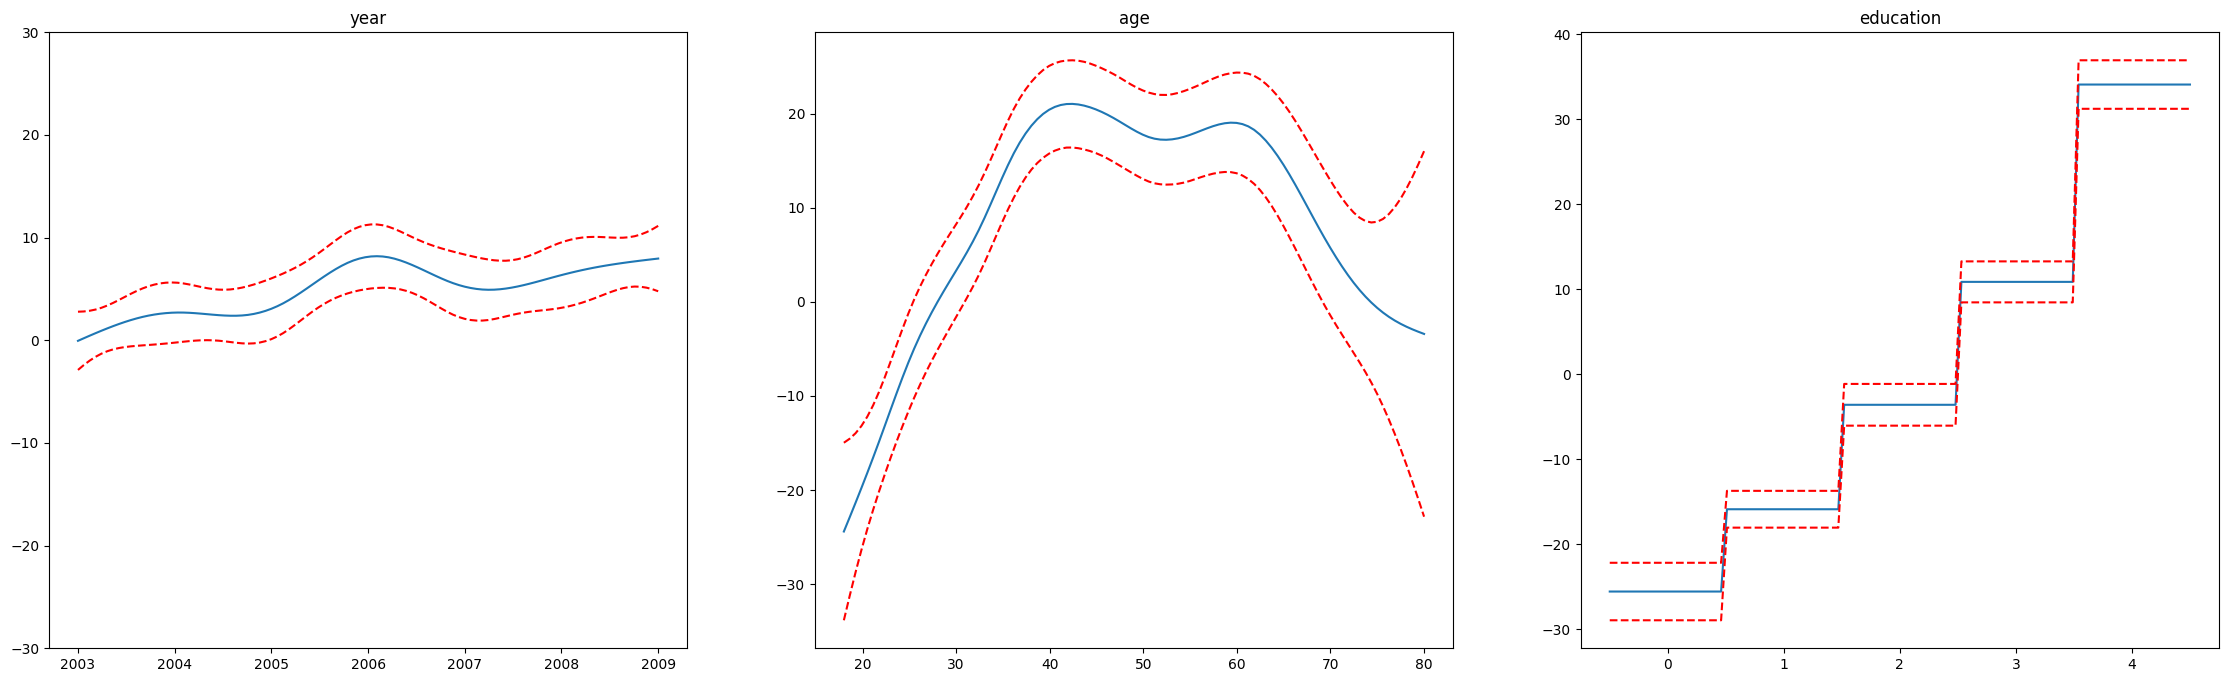

In [ ]:
from pygam import LinearGAM, s, f
from pygam.datasets import wage

X, y = wage(return_X_y=True)

## model
gam = LinearGAM(s(0) + s(1) + f(2))
gam.gridsearch(X, y)


## plotting
plt.figure();
fig, axs = plt.subplots(1,3);

titles = ['year', 'age', 'education']
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i]);

In [ ]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     19.2602
Link Function:                     IdentityLink Log Likelihood:                                -24116.7451
Number of Samples:                         3000 AIC:                                            48274.0107
                                                AICc:                                           48274.2999
                                                GCV:                                             1250.3656
                                                Scale:                                           1235.9245
                                                Pseudo R-Squared:                                   0.2945
Feature Function                  Lam

<ipython-input-78-dec6a6acdaaa>:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


More on this: https://pygam.readthedocs.io/en/latest/notebooks/tour_of_pygam.html#Functional-Form:

# KNN Regression

https://towardsdatascience.com/the-basics-knn-for-classification-and-regression-c1e8a6c955

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

wage = pd.read_csv("/content/wage.csv")

from sklearn.model_selection import train_test_split
train , test = train_test_split(wage, test_size = 0.3)

X_train = train[['age']]
y_train = train['wage']
X_test = test[['age']]
y_test = test['wage']

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=9)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=9)

In [ ]:
y_pred_knn=knn.predict(X_test)


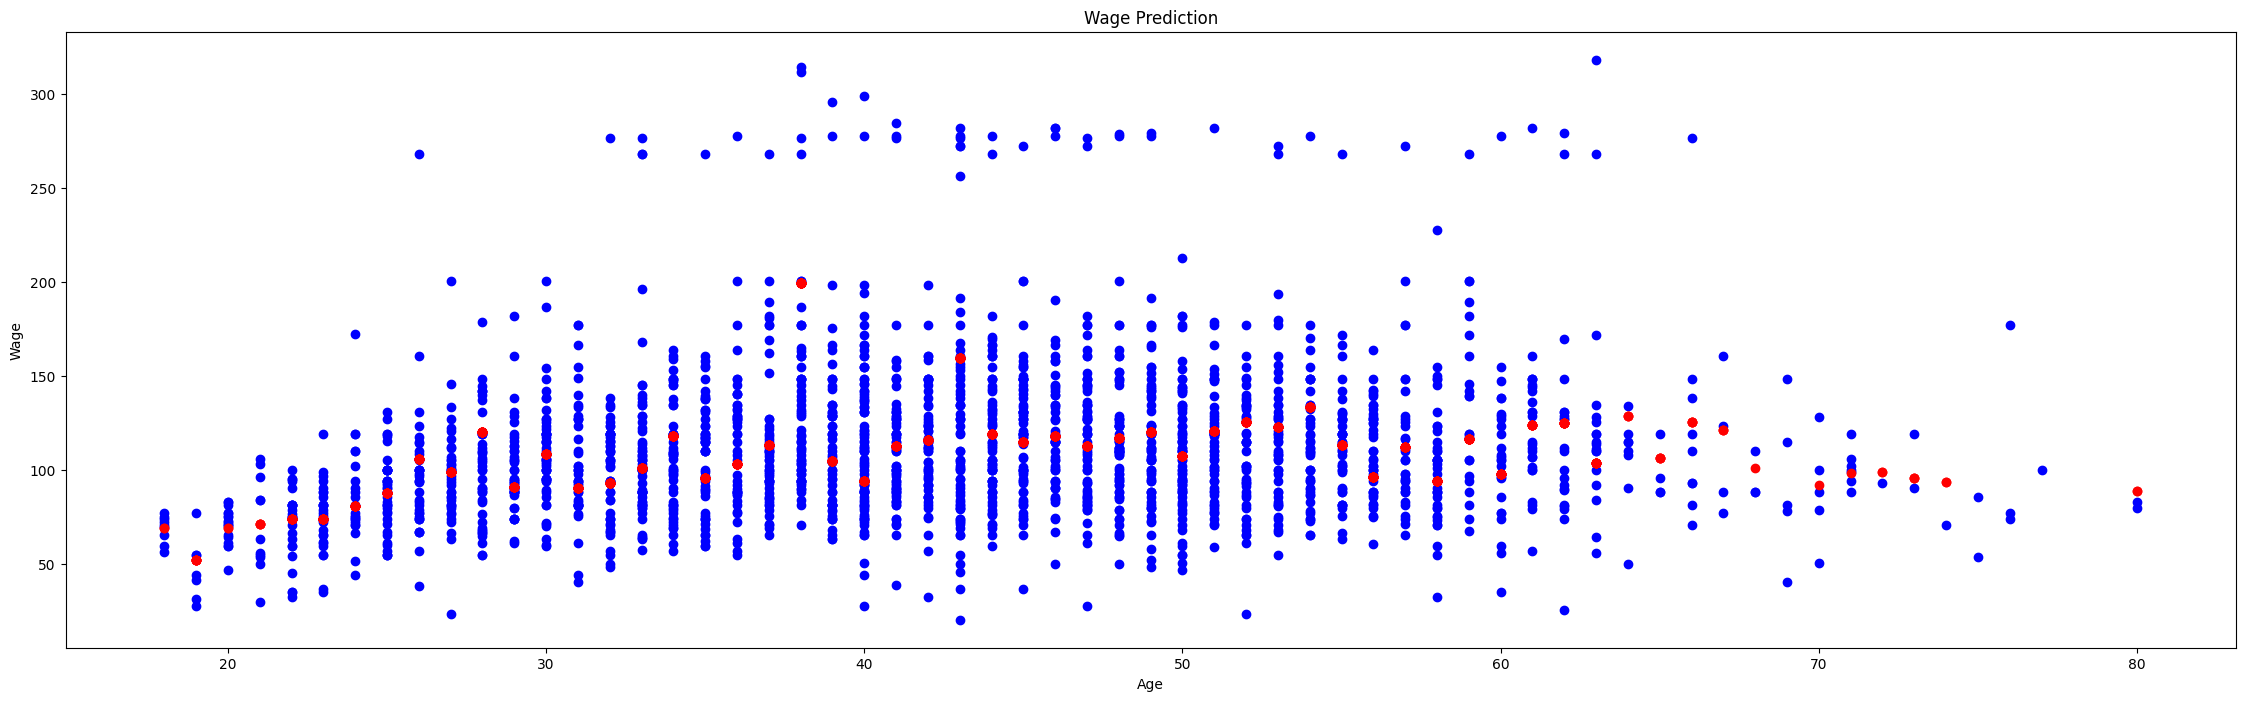

In [ ]:
plt.scatter(X_train,y_train,color="blue")
plt.scatter(X_test,knn.predict(X_test),color="red")
plt.title("Wage Prediction")
plt.xlabel("Age")
plt.ylabel("Wage")
plt.show()

In [ ]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error

rmse_val = [] #to store rmse values for different k
for K in range(100):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train) #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print("RMSE value for k= " , K , "is:", error)

RMSE value for k=  1 is: 50.95997681272188
RMSE value for k=  2 is: 46.20035611801533
RMSE value for k=  3 is: 46.37420189981124
RMSE value for k=  4 is: 46.7351750821421
RMSE value for k=  5 is: 46.16027726842029
RMSE value for k=  6 is: 45.2849076638991
RMSE value for k=  7 is: 45.0195948049943
RMSE value for k=  8 is: 44.97766930549303
RMSE value for k=  9 is: 45.02707330678599
RMSE value for k=  10 is: 45.00107227875127
RMSE value for k=  11 is: 44.5919230376716
RMSE value for k=  12 is: 44.17674374535636
RMSE value for k=  13 is: 43.68307192884254
RMSE value for k=  14 is: 43.43012559004444
RMSE value for k=  15 is: 43.583341205480465
RMSE value for k=  16 is: 43.426083745303465
RMSE value for k=  17 is: 43.271628560354166
RMSE value for k=  18 is: 43.01517497140491
RMSE value for k=  19 is: 42.831912211496096
RMSE value for k=  20 is: 42.75857571081071
RMSE value for k=  21 is: 42.57170231898422
RMSE value for k=  22 is: 42.689867249261574
RMSE value for k=  23 is: 42.61877819401

<Axes: >

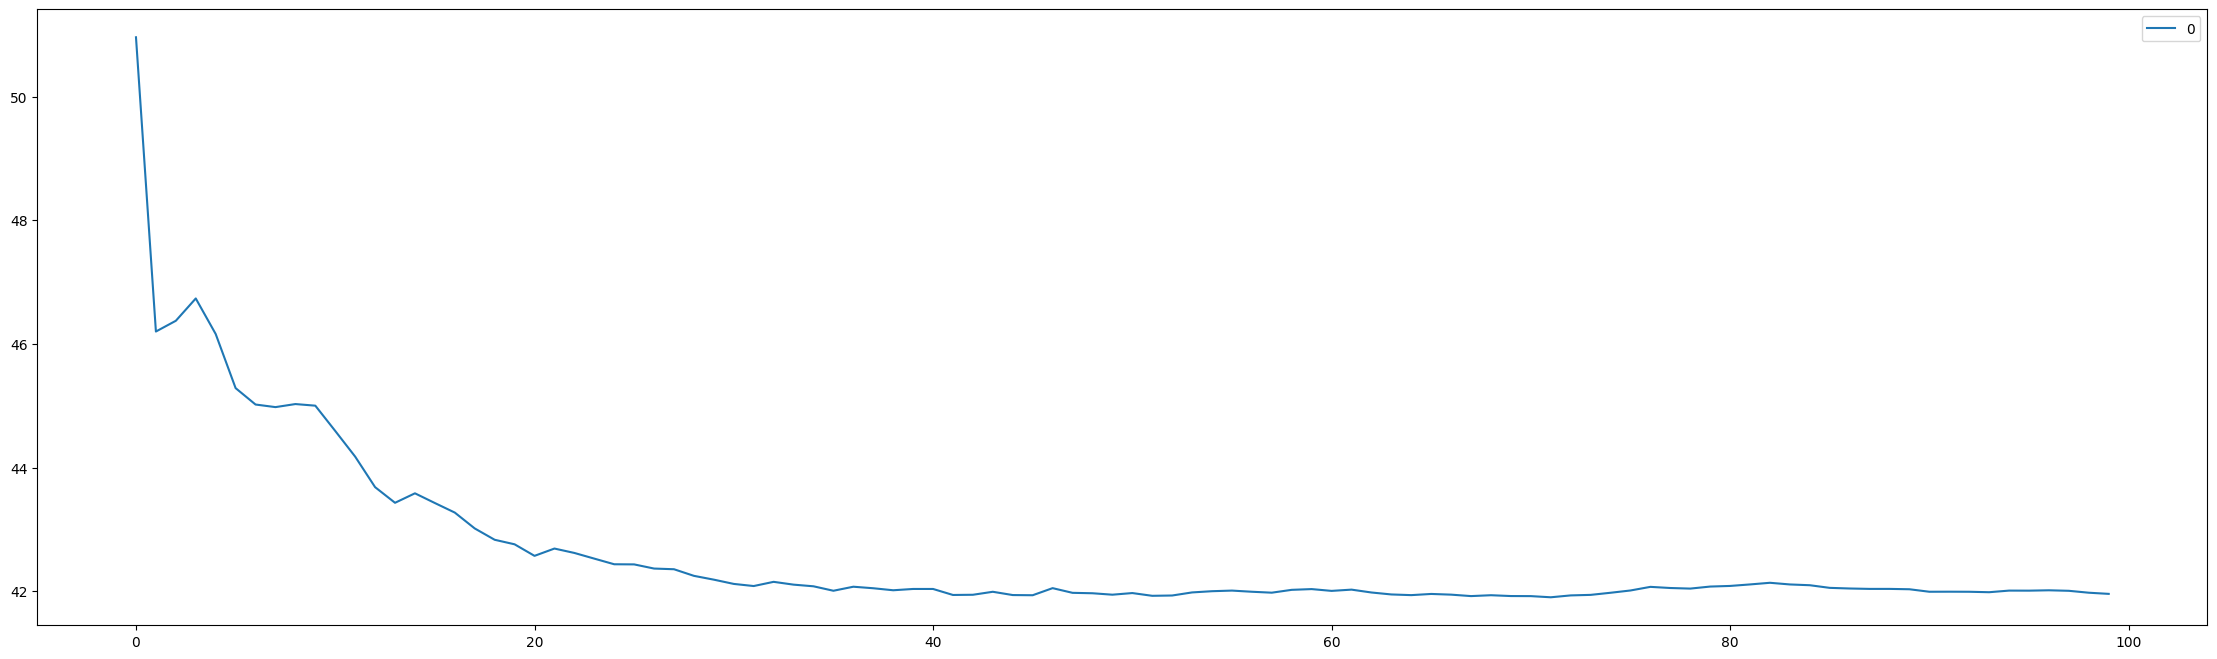

In [ ]:
#plotting the rmse values against k values ÁªòÂà∂ rmse ÂÄº‰∏é k ÂÄºÁöÑÂØπÂ∫îÂÖ≥Á≥ª
curve = pd.DataFrame(rmse_val) #elbow curve ËÇòÈÉ®Êõ≤Á∫ø
curve.plot()

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {"n_neighbors":list(range(1,100))}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 62}

# KNN Classifier

In [ ]:
from sklearn import datasets, neighbors, linear_model

X_digits, y_digits = datasets.load_digits(return_X_y=True)
X_digits = X_digits / X_digits.max()

n_samples = len(X_digits)

X_train = X_digits[:int(.9 * n_samples)]
y_train = y_digits[:int(.9 * n_samples)]
X_test = X_digits[int(.9 * n_samples):]
y_test = y_digits[int(.9 * n_samples):]

knn = neighbors.KNeighborsClassifier()
logistic = linear_model.LogisticRegression(max_iter=1000)

print('KNN score: %f' % knn.fit(X_train, y_train).score(X_test, y_test))
print('LogisticRegression score: %f'
      % logistic.fit(X_train, y_train).score(X_test, y_test))

KNN score: 0.961111
LogisticRegression score: 0.933333


In [ ]:
#pip install threadpoolctl==3.1.0

# Exercises

# 1 Cubic Spline regression ‰∏âÊ¨°Ê†∑Êù°ÂõûÂΩí
a) Since x < $\xi$ then $a_1 = \beta_0$ and $b_1 = \beta_1$ and $c_1 = \beta_2$ and $d_1 = \beta_3$

b) Must expand expression and group like polynomial terms. $a_1 = \beta_0 - \beta_4\xi^3$ and $b_1 = \beta_1 + \beta_4\xi^2$ and $c_1 = \beta_2 - 3\beta_4\xi$ and $d_1 = \beta_3 + \beta_4$

c) when $x=\xi$ the spline term equals 0 for both equations and thus they are equal

d, e) If they are equal then their derivatives must also be equal

a. Âõ†‰∏∫ x < $\xi$ Âàô $a_1 = \beta_0$ ‰∏î $b_1 = \beta_1$ ‰∏î $c_1 = \beta_2$ ‰∏î $d_1 = \beta_3$

b. ÂøÖÈ°ªÂ±ïÂºÄË°®ËææÂºèÂπ∂ÂÉèÂ§öÈ°πÂºèÈ°πÈÇ£Ê†∑ÂàÜÁªÑ„ÄÇ$a_1 = \beta_0 - \beta_4\xi^3$ ‰∏î $b_1 = \beta_1 + \beta_4\xi^2$ ‰∏î $c_1 = \beta_2 - 3\beta_4\xi$ ‰∏î $d_1 = \beta_3 + \beta_4$

c. ÂΩì $x=\xi$ Êó∂Ôºå‰∏§‰∏™ÊñπÁ®ãÁöÑÊ†∑Êù°È°πÈÉΩÁ≠â‰∫é 0ÔºåÂõ†Ê≠§ÂÆÉ‰ª¨Áõ∏Á≠â

d, e. Â¶ÇÊûúÂÆÉ‰ª¨Áõ∏Á≠âÔºåÂàôÂÆÉ‰ª¨ÁöÑÂØºÊï∞‰πüÂøÖÈ°ªÁõ∏Á≠â

# 2
a) g = 0  
b) g = mean(y)  
c) g = linear regression with 2 parameters - slope and intercept  
d) g = cubic term in regression with 3 parameters  
e) g = very high dimensional function that gives nearly 0 training error  

a. g = 0

b. g = Âπ≥ÂùáÂÄº (y)

c. g = ÂÖ∑Êúâ 2 ‰∏™ÂèÇÊï∞ÁöÑÁ∫øÊÄßÂõûÂΩí - ÊñúÁéáÂíåÊà™Ë∑ù

d. g = ÂÖ∑Êúâ 3 ‰∏™ÂèÇÊï∞ÁöÑÂõûÂΩí‰∏≠ÁöÑ‰∏âÊ¨°È°π

e. g = ÈùûÂ∏∏È´òÁª¥ÁöÑÂáΩÊï∞ÔºåÂÖ∂ËÆ≠ÁªÉËØØÂ∑ÆÂá†‰πé‰∏∫ 0

# 3

In [ ]:
x = np.linspace(-2, 2, 100)

In [ ]:
y = 1 + x + -2 * (x - 1) ** 2 * (x >= 1)

In [ ]:
plt.plot(x, y)

# 4

In [ ]:
b1_1 = (0 <= x) & (x <= 2)
b1_2 = (1 <= x) & (x <= 2)
b2_1 = (3 <= x) & (x <= 4)
b2_2 = (4 < x) & (x <= 5)

In [ ]:
y = 1 + b1_1 - (x - 1) * b1_2 + (x - 3) * b2_1 + b2_2

In [ ]:
plt.plot(x, y)

# 5
a) g2 will have smaller training error, since it is allowing more flexibility, can have up to a cubic model. g1 will be limited to a quadratic model as $\lambda$ approaches infinity

b) Can't tell which model will have smaller test error this depends on the 'true' relationship between x and y.

c) g1 and g2 will be the same model if there is no penalty

a) g2 ÁöÑËÆ≠ÁªÉËØØÂ∑Æ‰ºöÊõ¥Â∞èÔºåÂõ†‰∏∫ÂÆÉÂÖÅËÆ∏Êõ¥Â§ßÁöÑÁÅµÊ¥ªÊÄßÔºåÊúÄÂ§öÂèØ‰ª•Êúâ‰∏âÊ¨°Ê®°Âûã„ÄÇÂΩì $\lambda$ Ë∂ãËøë‰∫éÊó†Á©∑Â§ßÊó∂Ôºåg1 Â∞ÜË¢´ÈôêÂà∂‰∏∫‰∫åÊ¨°Ê®°Âûã

b) Êó†Ê≥ïÂà§Êñ≠Âì™‰∏™Ê®°ÂûãÁöÑÊµãËØïËØØÂ∑Æ‰ºöÊõ¥Â∞èÔºåËøôÂèñÂÜ≥‰∫é x Âíå y ‰πãÈó¥ÁöÑ‚ÄúÁúüÂÆû‚ÄùÂÖ≥Á≥ª„ÄÇ

c) Â¶ÇÊûúÊ≤°ÊúâÊÉ©ÁΩöÔºåg1 Âíå g2 Â∞ÜÊòØÂêå‰∏Ä‰∏™Ê®°Âûã

# 6

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import model_selection

In [ ]:
degrees = range(1, 11)
X = wage[['age']]
y = wage['wage']
final_scores = []
for degree in degrees:
    polynomial_features = PolynomialFeatures(degree=degree,
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])

    scores = model_selection.cross_val_score(pipeline,
                                            X, y, cv=10, scoring='neg_mean_squared_error')
    final_scores.append(-np.mean(scores))

In [ ]:
# degree 3 chosen through 10-fold CV ÈÄöËøá 10 ÂÄç CV ÈÄâÊã©ÁöÑ 3 Á∫ß
plt.plot(degrees, final_scores);

In [ ]:
# compare to anova: already done above. More evidence that 4th and 5th degree polynomial are not needed
# ‰∏éÊñπÂ∑ÆÂàÜÊûêÊØîËæÉÔºö‰∏äÈù¢Â∑≤ÁªèÂÆåÊàê„ÄÇÊõ¥Â§öËØÅÊçÆË°®Êòé‰∏çÈúÄË¶Å 4 Ê¨°Âíå 5 Ê¨°Â§öÈ°πÂºè
mod1 = smf.ols('wage ~ age', data=wage).fit()
mod2 = smf.ols('wage ~ age + np.power(age, 2)', data=wage).fit()
mod3 = smf.ols('wage ~ age + np.power(age, 2) + np.power(age, 3)', data=wage).fit()
mod4 = smf.ols('wage ~ age + np.power(age, 2) + np.power(age, 3) + np.power(age, 4)', data=wage).fit()
mod5 = smf.ols('wage ~ age + np.power(age, 2) + np.power(age, 3) + np.power(age, 4) + np.power(age, 5)', data=wage).fit()
anova_lm(mod1, mod2, mod3, mod4, mod5)

In [ ]:
polynomial_features = PolynomialFeatures(degree=3, include_bias=False)
linear_regression.fit(polynomial_features.fit_transform(X), y)

In [ ]:
x = np.linspace(X.values.min(), X.values.max(), 1000)

In [ ]:
plt.scatter(X, y)
plt.plot(x, linear_regression.predict(polynomial_features.fit_transform(x.reshape(-1, 1))), c='r', lw=3);

In [ ]:
cuts = range(1, 41)
X = wage[['age']]
y = wage['wage']
final_scores = []
for cut in cuts:
    X_new = pd.get_dummies(pd.cut(X['age'], cut)).values

    linear_regression = LinearRegression(fit_intercept=False)

    scores = model_selection.cross_val_score(linear_regression, X_new, y, cv=10, scoring='neg_mean_squared_error')
    final_scores.append(-np.mean(scores))

In [ ]:
# looks like error stops getting better after 7 cuts ÁúãËµ∑Êù•ÈîôËØØÂú® 7 Ê¨°ÂâäÂáè‰πãÂêéÂ∞±‰∏çÂÜçÂ•ΩËΩ¨‰∫Ü
plt.plot(cuts, final_scores);

In [ ]:
X_new = pd.get_dummies(pd.cut(X['age'], 7)).values
linear_regression = LinearRegression(fit_intercept=False)
linear_regression.fit(X_new, y)
plt.scatter(X, y)
order = np.argsort(X['age'])
plt.plot(X['age'].values[order], linear_regression.predict(X_new[order]), c='r', lw=3);

# 7

In [ ]:
wage = pd.read_csv('data/wage.csv')

In [ ]:
wage[['maritl', 'jobclass']].head()

In [ ]:
X = pd.get_dummies(wage[['maritl', 'jobclass']], drop_first=False)
y = wage['wage']

In [ ]:
X.head()

In [ ]:
linear_regression = LinearRegression(fit_intercept=True)
linear_regression.fit(X, y)

In [ ]:
linear_regression.coef_

In [ ]:
linear_regression.intercept_

In [ ]:
import statsmodels.api as sm

In [ ]:
results_orig = smf.OLS(y, X).fit()
results_orig.summary()

In [ ]:
wage[(wage['jobclass'] == '2. Information') & (wage['maritl'] == '3. Widowed')]['wage'].mean()

In [ ]:
wage[wage['maritl'] == '1. Never Married']['wage'].mean()

In [ ]:
wage[wage['jobclass'] == '1. Industrial']['wage'].mean()

In [ ]:
wage[wage['jobclass'] == '2. Information']['wage'].mean()

In [ ]:
wage['jobclass'].value_counts()

In [ ]:
wage[(wage['jobclass'] == '2. Information') & (wage['maritl'] == '3. Widowed')]['wage'].mean()

In [ ]:
27.6 + 82.3

In [ ]:
X = pd.get_dummies(wage['maritl'] + ' ' + wage['jobclass'])
y = wage['wage']

In [ ]:
results = smf.OLS(y, X).fit()
results.summary()

In [ ]:
wage[(wage['jobclass'] == '2. Information') & (wage['maritl'] == '3. Widowed')]['wage'].mean()

In [ ]:
results.predict([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
results_orig.predict([0, 0, 0, 1, 0, 1, 0])